
**Name : - Jyothish Kumar CHANDRASENAN GEETHAKUMARI**

**College : - EPITA, Paris**

**Course : -  MSc Computer Science Specialising in Data Science and Analytics (2019-2021)**



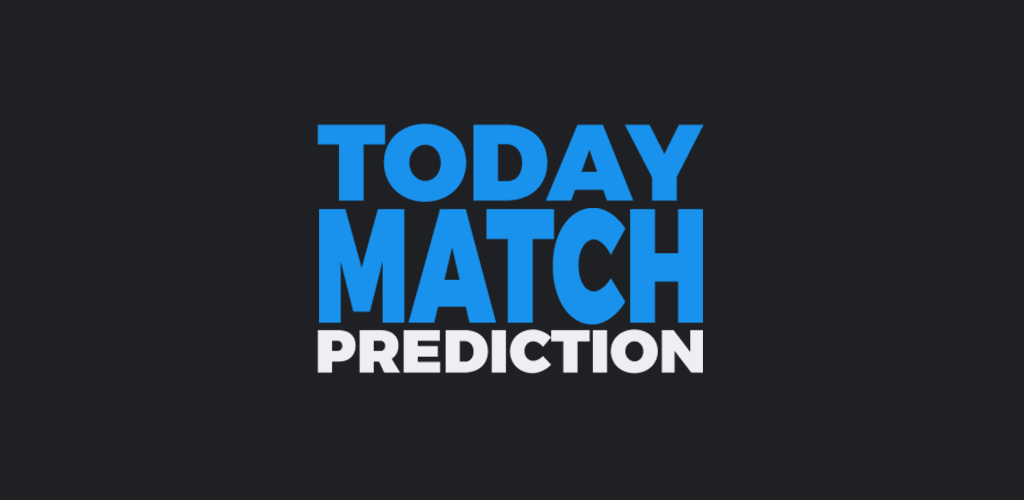


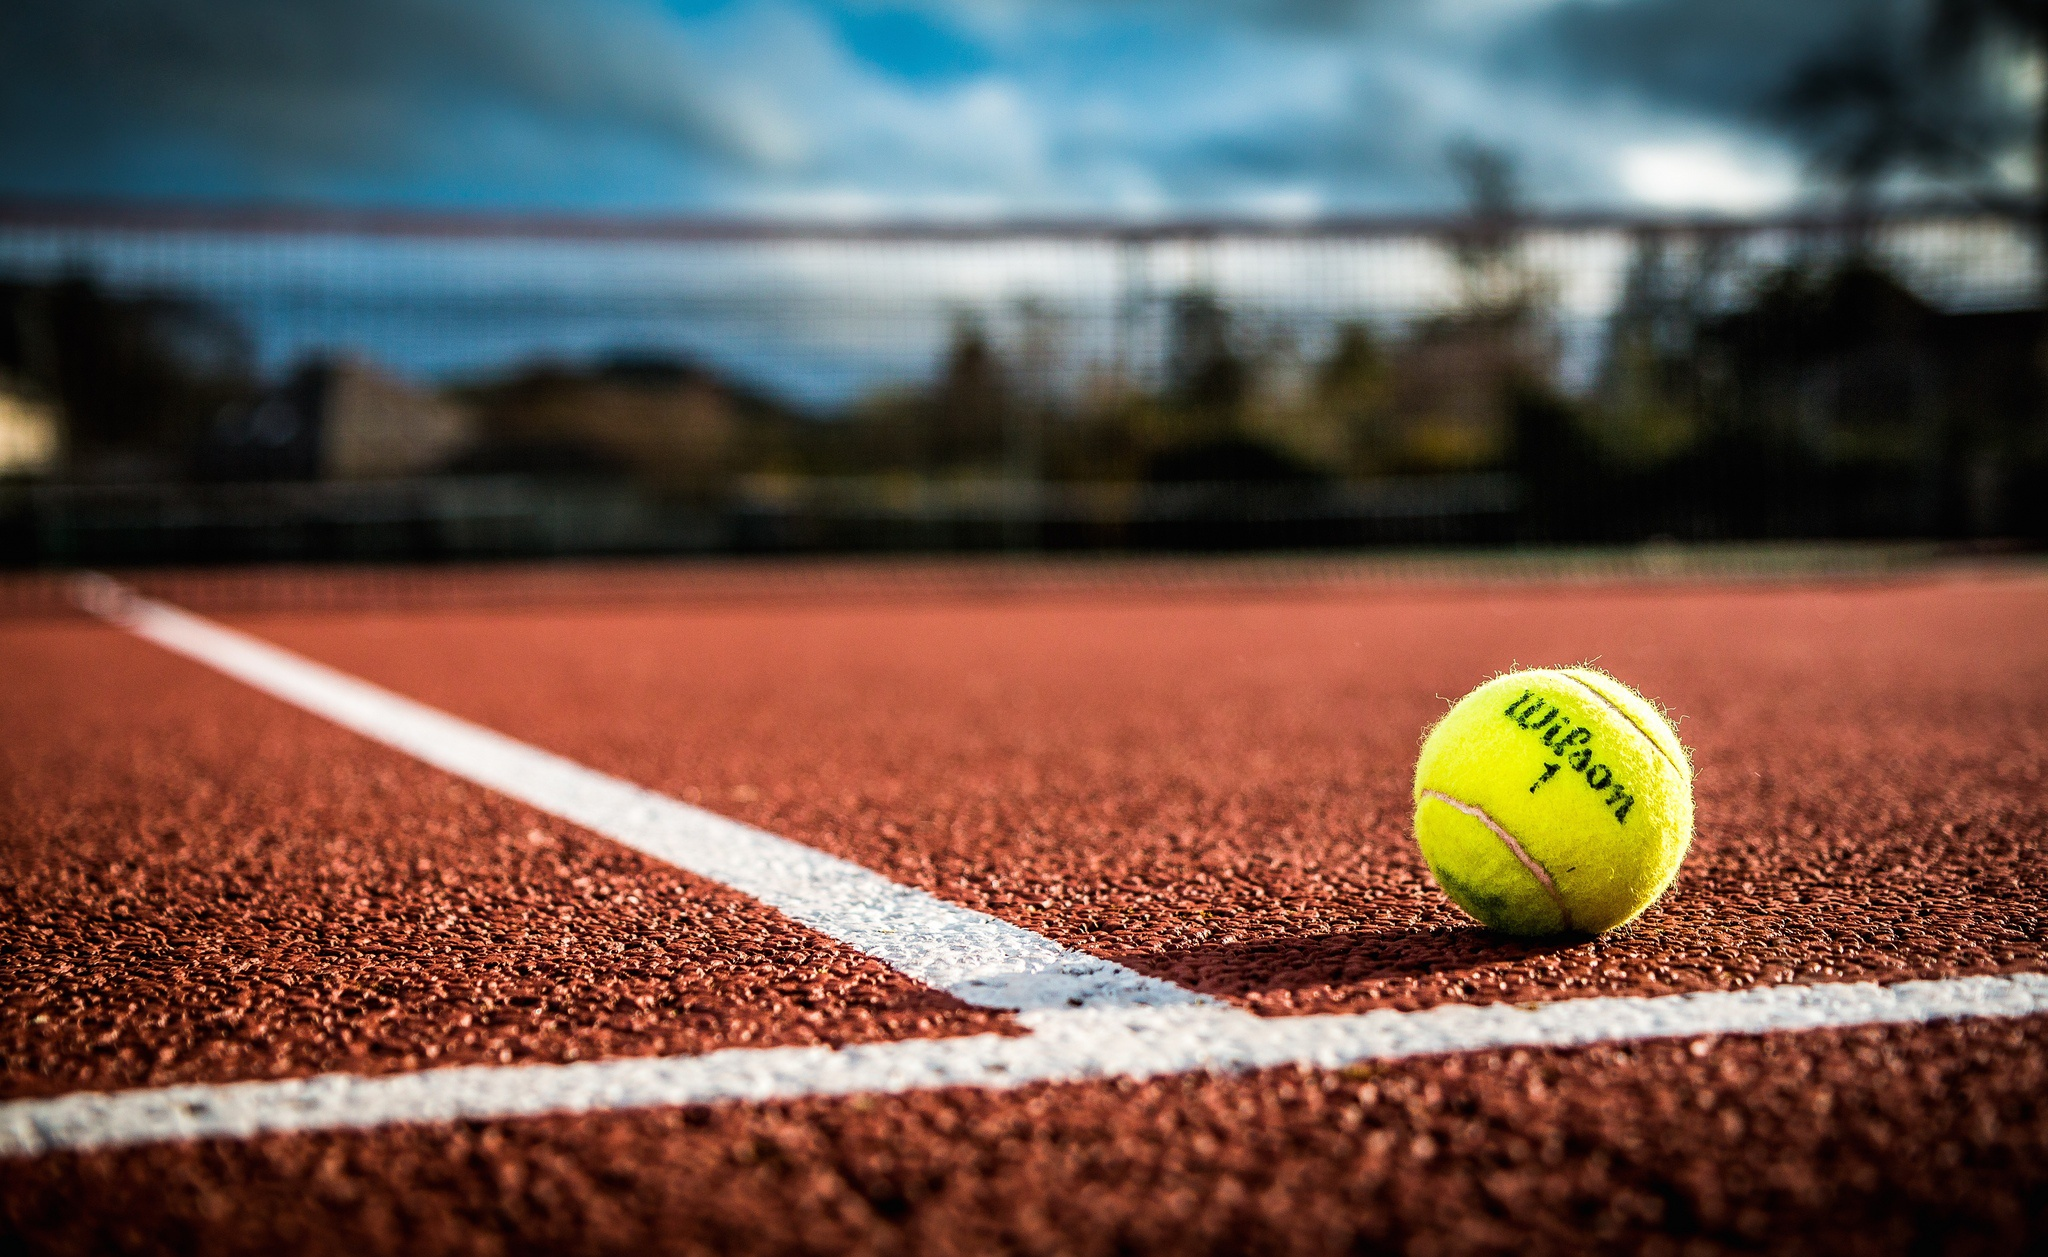





# Data Description

link : http://www.tennis-data.co.uk/notes.txt

Notes for Tennis Data

All data is in csv format, ready for use within standard spreadsheet applications. 

## Key to results data:

    ATP = Tournament number (men),
    WTA = Tournament number (women),
    Location = Venue of tournament Tournament = Name of tounament (including sponsor if relevant),
    Data = Date of match (note: prior to 2003 the date shown for all matches played in a single tournament is the start date), 
    Series = Name of ATP tennis series (Grand Slam, Masters, International or International Gold), 
    Tier = Tier (tournament ranking) of WTA tennis series.,
    Court = Type of court (outdoors or indoors), 
    Surface = Type of surface (clay, hard, carpet or grass),
    Round = Round of match, 
    Best of = Maximum number of sets playable in match,
    Winner = Match winner, 
    Loser = Match loser,
    WRank = ATP Entry ranking of the match winner as of the start of the tournament,
    LRank = ATP Entry ranking of the match loser as of the start of the tournament, 
    WPts = ATP Entry points of the match winner as of the start of the tournament, 
    LPts = ATP Entry points of the match loser as of the start of the tournament, 
    W1 = Number of games won in 1st set by match winner,
    L1 = Number of games won in 1st set by match loser,
    W2 = Number of games won in 2nd set by match winner, 
    L2 = Number of games won in 2nd set by match loser,
    W3 = Number of games won in 3rd set by match winner,
    L3 = Number of games won in 3rd set by match loser,
    W4 = Number of games won in 4th set by match winner,
    L4 = Number of games won in 4th set by match loser,
    W5 = Number of games won in 5th set by match winner,
    L5 = Number of games won in 5th set by match loser,
    Wsets = Number of sets won by match winner, 
    Lsets = Number of sets won by match loser,
    Comment = Comment on the match (Completed, won through retirement of loser, or via Walkover)


## Key to match betting odds data:

    B365W = Bet365 odds of match winner
    B365L = Bet365 odds of match loser
    B&WW = Bet&Win odds of match winner
    B&WL = Bet&Win odds of match loser
    CBW = Centrebet odds of match winner
    CBL = Centrebet odds of match loser
    EXW = Expekt odds of match winner
    EXL = Expekt odds of match loser
    LBW = Ladbrokes odds of match winner
    LBL = Ladbrokes odds of match loser
    GBW = Gamebookers odds of match winner
    GBL = Gamebookers odds of match loser
    IWW = Interwetten odds of match winner
    IWL = Interwetten odds of match loser
    PSW = Pinnacles Sports odds of match winner
    PSL = Pinnacles Sports odds of match loser
    SBW = Sportingbet odds of match winner
    SBL = Sportingbet odds of match loser
    SJW = Stan James odds of match winner
    SJL = Stan James odds of match loser
    UBW = Unibet odds of match winner
    UBL = Unibet odds of match loser

    MaxW= Maximum odds of match winner (as shown by Oddsportal.com)
    MaxL= Maximum odds of match loser (as shown by Oddsportal.com)
    AvgW= Average odds of match winner (as shown by Oddsportal.com)
    AvgL= Average odds of match loser (as shown by Oddsportal.com)

In [1]:
! pip install -q pandas
! pip install -q numpy
! pip install -q scikit-learn
! pip install -q urlopen
! pip install -q matplotlib
! pip install -q seaborn
! pip install -q plotly
! pip install -q wordcloud
! pip install -q scikit-plot

In [2]:
import pandas as pd
from urllib.request import urlopen  
import os.path as osp
import os
import logging
import zipfile
from glob import glob
logging.getLogger().setLevel('INFO')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
from wordcloud import WordCloud

In [4]:
def download_file(url_str, path):
    url = urlopen(url_str)
    output = open(path, 'wb')       
    output.write(url.read())
    output.close()  
    
def extract_file(archive_path, target_dir):
    zip_file = zipfile.ZipFile(archive_path, 'r')
    zip_file.extractall(target_dir)
    zip_file.close()

In [54]:
BASE_URL = 'http://tennis-data.co.uk'
DATA_DIR = "tennis_data"
ATP_DIR = './{}/ATP'.format(DATA_DIR)
WTA_DIR = './{}/WTA'.format(DATA_DIR)

ATP_URLS = [BASE_URL + "/%i/%i.zip" % (i,i) for i in range(2000,2020)]
WTA_URLS = [BASE_URL + "/%iw/%i.zip" % (i,i) for i in range(2007,2020)]

os.makedirs(osp.join(ATP_DIR, 'archives'), exist_ok=True)
os.makedirs(osp.join(WTA_DIR, 'archives'), exist_ok=True)

for files, directory in ((ATP_URLS, ATP_DIR), (WTA_URLS, WTA_DIR)):
    for dl_path in files:
        logging.info("downloading & extracting file %s", dl_path)
        archive_path = osp.join(directory, 'archives', osp.basename(dl_path))
        download_file(dl_path, archive_path)
        extract_file(archive_path, directory)
    
ATP_FILES = sorted(glob("%s/*.xls*" % ATP_DIR))
WTA_FILES = sorted(glob("%s/*.xls*" % WTA_DIR))

df_atp = pd.concat([pd.read_excel(f) for f in ATP_FILES], ignore_index=True)
df_wta = pd.concat([pd.read_excel(f) for f in WTA_FILES], ignore_index=True)

logging.info("%i matches ATP in df_atp", df_atp.shape[0])
logging.info("%i matches WTA in df_wta", df_wta.shape[0])

INFO:root:downloading & extracting file http://tennis-data.co.uk/2000/2000.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2001/2001.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2002/2002.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2003/2003.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2004/2004.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2005/2005.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2006/2006.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2007/2007.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2008/2008.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2009/2009.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2010/2010.zip
INFO:root:downloading & extracting file http://tennis-data.co.uk/2011/2011.zip
INFO:root:downloading & extracting file http://tenni

In [55]:
pd.set_option('display.max_columns', None)
df_atp[0:10]

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,CBW,CBL,GBW,GBL,IWW,IWL,SBW,SBL,B365W,B365L,B&WW,B&WL,EXW,EXL,PSW,PSL,WPts,LPts,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,63,77,6.0,4.0,6,2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Enqvist T.,Clement A.,5,56,6.0,3.0,6,3,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,40,655,6.0,7.0,7,5,6,3,NaN,NaN,NaN,NaN,2.0,1,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Federer R.,Knippschild J.,65,87,6.0,1.0,6,4,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,81,198,7.0,6.0,5,7,6,4,NaN,NaN,NaN,NaN,2.0,1,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Gambill J.M.,Arthurs W.,58,105,3.0,6.0,7,6,6,4,NaN,NaN,NaN,NaN,2.0,1,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Grosjean S.,Ilie A.,26,51,6.0,2.0,6,1,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Henman T.,Balcells J.,11,218,6.0,4.0,7,6,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Hewitt L.,Woodforde M.,24,129,6.0,3.0,2,6,6,1,NaN,NaN,NaN,NaN,2.0,1,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Lisnard J.,Tebbutt M.,134,351,7.0,6.0,6,7,6,4,NaN,NaN,NaN,NaN,2.0,1,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df_atp["ID"] = df_atp.index + 1
df_atp[0:10]

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,CBW,CBL,GBW,GBL,IWW,IWL,SBW,SBL,B365W,B365L,B&WW,B&WL,EXW,EXL,PSW,PSL,WPts,LPts,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL,ID
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,63,77,6.0,4.0,6,2,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Enqvist T.,Clement A.,5,56,6.0,3.0,6,3,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,40,655,6.0,7.0,7,5,6,3,NaN,NaN,NaN,NaN,2.0,1,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Federer R.,Knippschild J.,65,87,6.0,1.0,6,4,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,81,198,7.0,6.0,5,7,6,4,NaN,NaN,NaN,NaN,2.0,1,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Gambill J.M.,Arthurs W.,58,105,3.0,6.0,7,6,6,4,NaN,NaN,NaN,NaN,2.0,1,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
6,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Grosjean S.,Ilie A.,26,51,6.0,2.0,6,1,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Henman T.,Balcells J.,11,218,6.0,4.0,7,6,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
8,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Hewitt L.,Woodforde M.,24,129,6.0,3.0,2,6,6,1,NaN,NaN,NaN,NaN,2.0,1,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Lisnard J.,Tebbutt M.,134,351,7.0,6.0,6,7,6,4,NaN,NaN,NaN,NaN,2.0,1,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [57]:
print("Number of records in the dataset: - ",len(df_atp))

Number of records in the dataset: -  54908


In [58]:
print("Number of columns in the dataset: - ",df_atp.shape[1])

Number of columns in the dataset: -  55


In [59]:
df_atp.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1',
       'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets',
       'Comment', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL',
       'B365W', 'B365L', 'B&WW', 'B&WL', 'EXW', 'EXL', 'PSW', 'PSL', 'WPts',
       'LPts', 'UBW', 'UBL', 'LBW', 'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL', 'ID'],
      dtype='object')

In [60]:
print("**************************")
print("Data type of columns")
print("**************************")

df_atp.info()

**************************
Data type of columns
**************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54908 entries, 0 to 54907
Data columns (total 55 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         54908 non-null  int64         
 1   Location    54908 non-null  object        
 2   Tournament  54908 non-null  object        
 3   Date        54908 non-null  datetime64[ns]
 4   Series      54908 non-null  object        
 5   Court       54908 non-null  object        
 6   Surface     54908 non-null  object        
 7   Round       54908 non-null  object        
 8   Best of     54908 non-null  int64         
 9   Winner      54908 non-null  object        
 10  Loser       54908 non-null  object        
 11  WRank       54889 non-null  object        
 12  LRank       54817 non-null  object        
 13  W1          54624 non-null  float64       
 14  L1          54626 non-null  float64       


In [62]:
# Filling the missing values of sets with 0 - which makes sense since some games can be cancelled, some sets have not played
print("******************************************")
print("Converting relevant variables to float type")
print("******************************************")


df_atp['W1']=pd.to_numeric(df_atp["W1"],errors='coerce').fillna(0).astype(float)  
df_atp['L1']=pd.to_numeric(df_atp["L1"],errors='coerce').fillna(0).astype(float) 

df_atp['W2']=pd.to_numeric(df_atp["W2"],errors='coerce').fillna(0).astype(float)  
df_atp['L2']=pd.to_numeric(df_atp["L2"],errors='coerce').fillna(0).astype(float) 

df_atp['W3']=pd.to_numeric(df_atp["W3"],errors='coerce').fillna(0).astype(float)  
df_atp['L3']=pd.to_numeric(df_atp["L3"],errors='coerce').fillna(0).astype(float) 

df_atp['W4']=pd.to_numeric(df_atp["W4"],errors='coerce').fillna(0).astype(float)  
df_atp['L4']=pd.to_numeric(df_atp["L4"],errors='coerce').fillna(0).astype(float)

df_atp['W5']=pd.to_numeric(df_atp["W5"],errors='coerce').fillna(0).astype(float)  
df_atp['L5']=pd.to_numeric(df_atp["L5"],errors='coerce').fillna(0).astype(float) 


df_atp['Wsets']=pd.to_numeric(df_atp["Wsets"],errors='coerce').fillna(0).astype(float)
df_atp['Lsets']=pd.to_numeric(df_atp["Lsets"],errors='coerce').fillna(0).astype(float)

df_atp['WRank']=pd.to_numeric(df_atp["WRank"],errors='coerce').fillna(0).astype(float)
df_atp['LRank']=pd.to_numeric(df_atp["LRank"],errors='coerce').fillna(0).astype(float)


df_atp.info()

******************************************
Converting relevant variables to float type
******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54908 entries, 0 to 54907
Data columns (total 55 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         54908 non-null  int64         
 1   Location    54908 non-null  object        
 2   Tournament  54908 non-null  object        
 3   Date        54908 non-null  datetime64[ns]
 4   Series      54908 non-null  object        
 5   Court       54908 non-null  object        
 6   Surface     54908 non-null  object        
 7   Round       54908 non-null  object        
 8   Best of     54908 non-null  int64         
 9   Winner      54908 non-null  object        
 10  Loser       54908 non-null  object        
 11  WRank       54908 non-null  float64       
 12  LRank       54908 non-null  float64       
 13  W1          54908 non-null  float64 

In [63]:
print("**************************")
print("Missing Values Information")
print("**************************")
df_atp.isna().sum()

**************************
Missing Values Information
**************************


ATP               0
Location          0
Tournament        0
Date              0
Series            0
Court             0
Surface           0
Round             0
Best of           0
Winner            0
Loser             0
WRank             0
LRank             0
W1                0
L1                0
W2                0
L2                0
W3                0
L3                0
W4                0
L4                0
W5                0
L5                0
Wsets             0
Lsets             0
Comment           0
CBW           37402
CBL           37402
GBW           49853
GBL           49853
IWW           41550
IWL           41550
SBW           49484
SBL           49484
B365W          8668
B365L          8645
B&WW          53811
B&WL          53811
EXW           15497
EXL           15492
PSW           14970
PSL           14970
WPts          16207
LPts          16276
UBW           44237
UBL           44237
LBW           26777
LBL           26766
SJW           39336
SJL           39329


In [64]:
# Filling the missing values of sets with 0 - which makes sense since some games can be cancelled, some sets have not played

df_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54908 entries, 0 to 54907
Data columns (total 55 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ATP         54908 non-null  int64         
 1   Location    54908 non-null  object        
 2   Tournament  54908 non-null  object        
 3   Date        54908 non-null  datetime64[ns]
 4   Series      54908 non-null  object        
 5   Court       54908 non-null  object        
 6   Surface     54908 non-null  object        
 7   Round       54908 non-null  object        
 8   Best of     54908 non-null  int64         
 9   Winner      54908 non-null  object        
 10  Loser       54908 non-null  object        
 11  WRank       54908 non-null  float64       
 12  LRank       54908 non-null  float64       
 13  W1          54908 non-null  float64       
 14  L1          54908 non-null  float64       
 15  W2          54908 non-null  float64       
 16  L2          54908 non-

In [65]:
print("**************************")
print("Deleting the columns which has more than 80% missing values")
df_atp = df_atp[df_atp.columns[df_atp.isnull().mean() <= 0.2]]
print("**************************")
df_atp.isna().sum()

**************************
Deleting the columns which has more than 80% missing values
**************************


ATP              0
Location         0
Tournament       0
Date             0
Series           0
Court            0
Surface          0
Round            0
Best of          0
Winner           0
Loser            0
WRank            0
LRank            0
W1               0
L1               0
W2               0
L2               0
W3               0
L3               0
W4               0
L4               0
W5               0
L5               0
Wsets            0
Lsets            0
Comment          0
B365W         8668
B365L         8645
ID               0
dtype: int64

In [66]:
print("******************************************")
print("Filling Missing Values with 0")
df_atp = df_atp.fillna(0,axis=1)
print("******************************************")

print("Number of Missing Values in the Dataset after filling ")
print("******************************************")
df_atp.isna().sum()

******************************************
Filling Missing Values with 0
******************************************
Number of Missing Values in the Dataset after filling 
******************************************


ATP           0
Location      0
Tournament    0
Date          0
Series        0
Court         0
Surface       0
Round         0
Best of       0
Winner        0
Loser         0
WRank         0
LRank         0
W1            0
L1            0
W2            0
L2            0
W3            0
L3            0
W4            0
L4            0
W5            0
L5            0
Wsets         0
Lsets         0
Comment       0
B365W         0
B365L         0
ID            0
dtype: int64

In [67]:
# Creating a new column called year from the Date object

print("******************************************")
print("Extracting YEAR from Date Variable")
print("******************************************")

df_atp['Date'] = pd.to_datetime(df_atp['Date'])

df_atp['Year'] = df_atp['Date'].dt.year

df_atp['Year']

******************************************
Extracting YEAR from Date Variable
******************************************


0        2000
1        2000
2        2000
3        2000
4        2000
         ... 
54903    2019
54904    2019
54905    2019
54906    2019
54907    2019
Name: Year, Length: 54908, dtype: int64

In [68]:
# To check the unique list of winners
df_atp['Winner'].unique()

array(['Dosedel S.', 'Enqvist T.', 'Escude N.', 'Federer R.',
       'Fromberg R.', 'Gambill J.M.', 'Grosjean S.', 'Henman T.',
       'Hewitt L.', 'Lisnard J.', 'Martin A.', 'Norman M.', 'Petrovic D.',
       'Sekulov J.', 'Stoltenberg J.', 'Vinck C.', 'Agenor R.',
       'Behrend T.', 'Damm M.', 'Delgado J.', 'Golmard J.', 'Hantschk M.',
       'Jonsson F.', 'Ketola T.', 'Manta L.', 'Paes L.', 'Pioline C.',
       'Sanguinetti D.', 'Stanoytchev O.', 'Tabara M.', 'Vanek J.',
       'Vinciguerra A.', 'Bastl G.', 'Berasategui A.', 'Caratti C.',
       'Cherkasov A.', 'El Aynaoui Y.', 'Gaudio G.', 'Kiefer N.',
       'Marin J.A.', 'Mirnyi M.', 'Santoro F.', 'Schalken S.',
       'Schuettler R.', 'Squillari F.', 'Tillstrom M.', 'Vacek D.',
       'van Lottum J.', 'Balcells J.', 'Chang M.', 'Ferrero J.C.',
       'Gustafsson M.', 'Haas T.', 'Johansson T.', 'Novak J.',
       'Rosset M.', 'Sell M.', 'Arazi H.', 'Clavet F.', 'Clement A.',
       'Corretja A.', 'Hrbaty D.', 'Ilie A.', 'Koubek

In [69]:
df_atp['Winner'].value_counts()

Federer R.     1172
Nadal R.        943
Djokovic N.     856
Ferrer D.       699
Murray A.       634
               ... 
Schranz W.        1
MacPhie B.        1
Willis M.         1
Lee D.H.          1
Smeets R.         1
Name: Winner, Length: 976, dtype: int64

# 1. Who are the three ATP players with the most wins ?

**********************
Top three ATP Players
**********************
Federer R.     1172
Nadal R.        943
Djokovic N.     856
Name: Winner, dtype: int64
#############################################################################################################################################
Please note there are some values for "Federer R. ", "Nadal-Parera R." , "Djokovic N. " which I am ignoring due to formatting issue!!! 
#############################################################################################################################################


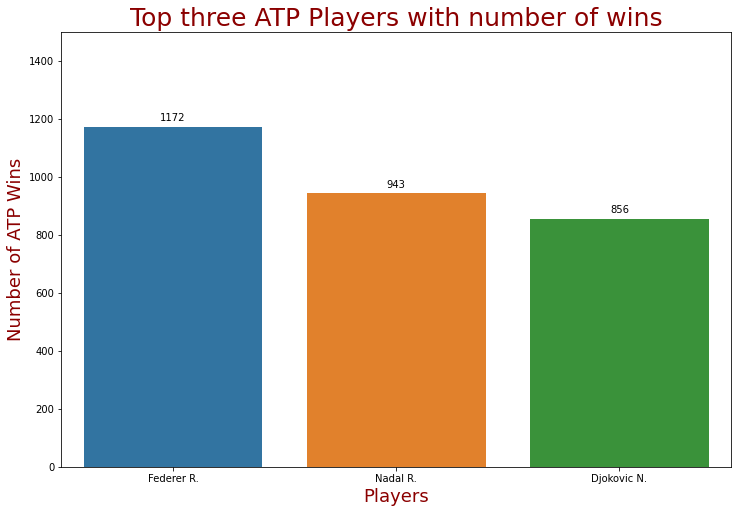

In [70]:
print("**********************")
print("Top three ATP Players")
print("**********************")

top3_winners = df_atp['Winner'].value_counts()[0:3]  
print(top3_winners)

print("#############################################################################################################################################")
print("""Please note there are some values for "Federer R. ", "Nadal-Parera R." , "Djokovic N. " which I am ignoring due to formatting issue!!! """)
print("#############################################################################################################################################")
plt.figure(figsize=(12,8))
ax = sns.barplot(x=top3_winners.index, y=top3_winners)
ax.set_ylim(0, 1500)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2.0, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Players", size= 18, color="darkred")
plt.ylabel("Number of ATP Wins",size =18, color = "darkred")
plt.title("Top three ATP Players with number of wins",size=25, color= "darkred")
plt.show()

# 2. How many sets did the player “ Federer R.” win in total ?

In [71]:
winner_sets = df_atp.groupby("Winner")["Wsets"].sum()
print("****************************")
print("Sets won by Roger Federer")
print("****************************")
print(int(winner_sets["Federer R."]))

print("###########################################################################################################")
print("""Please note there are some values for "Federer R. ", which I am ignoring due to formatting issue!!! """)
print("###########################################################################################################")

fig2 = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = winner_sets["Federer R."],
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Number of Sets won by Roger Federer in ATP"},
    gauge = {
        'axis': { 'tickwidth': 5, 'tickcolor': "darkgreen"},
        'bar': {'color': "darkblue"},}))

fig2.show()



****************************
Sets won by Roger Federer
****************************
2662
###########################################################################################################
Please note there are some values for "Federer R. ", which I am ignoring due to formatting issue!!! 
###########################################################################################################


# 3. How many sets did the player “ Federer R.” win during the years 2016 and 2017 ?

In [72]:
year_winners_sets = df_atp.groupby("Year")["Winner","Wsets"]

year_winners_sets_2016 = year_winners_sets.get_group(2016)
year_winners_sets_2017 = year_winners_sets.get_group(2017)

winner_sets_2016 = year_winners_sets_2016.groupby("Winner")["Wsets"].sum()
winner_sets_2017 = year_winners_sets_2017.groupby("Winner")["Wsets"].sum()

print("*********************************************")
print("Sets won by Roger Federer in 2016 and 2017")
print("*********************************************")
print(int(winner_sets_2016["Federer R."])+int(winner_sets_2017["Federer R."]))

print("###########################################################################################################")
print("""Please note there are some values for "Federer R. " , which I am ignoring due to formatting issue!!! """)
print("###########################################################################################################")

fig3 = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = winner_sets_2016["Federer R."]+winner_sets_2017["Federer R."],
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Number of Sets won by Roger Federer in ATP for the year 2016 and 2017"},
    gauge = {
        'axis': { 'tickwidth': 5, 'tickcolor': "darkblue"},
        'bar': {'color': "darkgreen"} }))

fig3.show()



*********************************************
Sets won by Roger Federer in 2016 and 2017
*********************************************
172
###########################################################################################################
Please note there are some values for "Federer R. " , which I am ignoring due to formatting issue!!! 
###########################################################################################################


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



# 4. For each match, what is the percentage of victories of the winner in the past ?

In [73]:

%%time 
## Please note this cell will take atleast 3-4 minutes to execute completely

print("###########################################################################################################")
print("Creating the records of Match, Game and Set winning percentages of every player based on past performance")
print("                                                 Please be patient                                       ")
print("###########################################################################################################")

players_history = {}

for each_player in df_atp['Winner']:
    players_history[each_player] = {'TotalMatchWin':0,'TotalMatchLost':0,'TotalGameWon':0,'TotalGameLost':0,'TotalSetsWon':0,'TotalSetsLost':0}

for each_player in df_atp['Loser']:
    players_history[each_player] = {'TotalMatchWin':0,'TotalMatchLost':0,'TotalGameWon':0,'TotalGameLost':0,'TotalSetsWon':0,'TotalSetsLost':0}
    
#print(player_win_loss_history)    
    
for i in range(0, len(df_atp)):

    winner_player = df_atp.loc[i,'Winner']
    loser_player = df_atp.loc[i,'Loser']
    
    w1 = df_atp.loc[i,'W1']
    w2 = df_atp.loc[i,'W2']
    w3 = df_atp.loc[i,'W3']
    w4 = df_atp.loc[i,'W4']
    w5 = df_atp.loc[i,'W5']
    
    l1 = df_atp.loc[i,'L1']
    l2 = df_atp.loc[i,'L2']
    l3 = df_atp.loc[i,'L3']
    l4 = df_atp.loc[i,'L4']
    l5 = df_atp.loc[i,'L5']
    
    w_sets = df_atp.loc[i,'Wsets']
    l_sets = df_atp.loc[i,'Lsets']
    
    player1_total_match_win = players_history[winner_player]['TotalMatchWin']
    player1_total_match_loss = players_history[winner_player]['TotalMatchLost']
    player1_total_match = player1_total_match_win + player1_total_match_loss
    
    player1_total_game_win = players_history[winner_player]['TotalGameWon']
    player1_total_game_loss = players_history[winner_player]['TotalGameLost']
    player1_total_game = player1_total_game_win + player1_total_game_loss
    
    player1_total_sets_win = players_history[winner_player]['TotalSetsWon']
    player1_total_sets_loss = players_history[winner_player]['TotalSetsLost']
    player1_total_sets = player1_total_sets_win + player1_total_sets_loss
    
    
    player2_total_match_win = players_history[loser_player]['TotalMatchWin']
    player2_total_match_loss = players_history[loser_player]['TotalMatchLost']
    player2_total_match = player2_total_match_win + player2_total_match_loss
    
    player2_total_game_win = players_history[loser_player]['TotalGameWon']
    player2_total_game_loss = players_history[loser_player]['TotalGameLost']
    player2_total_game = player2_total_game_win + player2_total_game_loss
    
    player2_total_sets_win = players_history[loser_player]['TotalSetsWon']
    player2_total_sets_loss = players_history[loser_player]['TotalSetsLost']
    player2_total_sets = player2_total_sets_win + player2_total_sets_loss
    
    
    
    if (player1_total_match == 0):

      df_atp.loc[i, 'Player1MatchVictory%'] = 0
      df_atp.loc[i, 'Player1GameVictory%'] = 0
      df_atp.loc[i, 'Player1SetVictory%'] = 0
      

    if (player2_total_match == 0):    

      df_atp.loc[i, 'Player2MatchVictory%'] = 0
      df_atp.loc[i, 'Player2GameVictory%'] = 0
      df_atp.loc[i, 'Player2SetVictory%'] = 0    
      

    elif ((player1_total_match != 0) and (player2_total_match != 0) ):

      df_atp.loc[i, 'Player1MatchVictory%'] = round((player1_total_match_win  / player1_total_match) * 100,2)
      df_atp.loc[i, 'Player1GameVictory%'] = round((player1_total_game_win  / player1_total_game) * 100,2)
      df_atp.loc[i, 'Player1SetVictory%'] = round((player1_total_sets_win  / player1_total_sets) * 100,2)
        
      df_atp.loc[i, 'Player2MatchVictory%'] = round((player2_total_match_loss  / player2_total_match) * 100,2)
      df_atp.loc[i, 'Player2GameVictory%'] = round((player2_total_game_loss  / player2_total_game) * 100,2)
      df_atp.loc[i, 'Player2SetVictory%'] = round((player2_total_sets_loss  / player2_total_sets) * 100,2)
    
    
    players_history[winner_player]['TotalMatchWin'] = players_history[winner_player]['TotalMatchWin'] + 1
    players_history[loser_player]['TotalMatchLost'] = players_history[loser_player]['TotalMatchLost'] + 1
    
    players_history[winner_player]['TotalGameWon'] = players_history[winner_player]['TotalGameWon'] + w1 + w2 + w3 + w4 + w5
    players_history[loser_player]['TotalGameLost'] = players_history[loser_player]['TotalGameLost'] + l1 + l2 + l3 + l4 + l5
    
    players_history[winner_player]['TotalSetsWon'] = players_history[winner_player]['TotalSetsWon'] + w_sets
    players_history[loser_player]['TotalSetsLost'] = players_history[loser_player]['TotalSetsLost'] + l_sets
    

#print(player_win_loss_history)      
#print(df_atp['Player1MatchVictory%'])
#print(df_atp['Player1GameVictory%'])
#print(df_atp['Player1SetVictory%'])

#print(df_atp['Player2MatchVictory%'])
#print(df_atp['Player2GameVictory%'])
#print(df_atp['Player2SetVictory%'])

print("***********************************************************************************")
print("Match, Game and Set Victory Percentage of Federer before the start of every match")
print("************************************************************************************")

Federer = df_atp[(df_atp["Winner"]=="Federer R.")]
print(Federer.loc[:,['Winner','Loser','Player1MatchVictory%', 'Player1GameVictory%', 'Player1SetVictory%']])

###########################################################################################################
Creating the records of Match, Game and Set winning percentages of every player based on past performance
                                                 Please be patient                                       
###########################################################################################################


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:83: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: RuntimeWarning:

invalid value encountered in double_scalars



***********************************************************************************
Match, Game and Set Victory Percentage of Federer before the start of every match
************************************************************************************
           Winner           Loser  Player1MatchVictory%  Player1GameVictory%  \
3      Federer R.  Knippschild J.                  0.00                 0.00   
168    Federer R.        Chang M.                 33.33                40.00   
229    Federer R.      Kroslak J.                 50.00                63.27   
316    Federer R.       Dupuis A.                 50.00                65.79   
329    Federer R.    Johansson T.                 57.14                70.45   
...           ...             ...                   ...                  ...   
54785  Federer R.    Gojowczyk P.                 82.88                84.88   
54800  Federer R.        Albot R.                 82.90                84.89   
54810  Federer R.     Wawrink

In [74]:
# Complete Game Status of each Player
print(players_history) 

{'Dosedel S.': {'TotalMatchWin': 22, 'TotalMatchLost': 36, 'TotalGameWon': 347.0, 'TotalGameLost': 359.0, 'TotalSetsWon': 50.0, 'TotalSetsLost': 16.0}, 'Enqvist T.': {'TotalMatchWin': 137, 'TotalMatchLost': 115, 'TotalGameWon': 2099.0, 'TotalGameLost': 1259.0, 'TotalSetsWon': 300.0, 'TotalSetsLost': 55.0}, 'Escude N.': {'TotalMatchWin': 109, 'TotalMatchLost': 78, 'TotalGameWon': 1652.0, 'TotalGameLost': 787.0, 'TotalSetsWon': 238.0, 'TotalSetsLost': 38.0}, 'Federer R.': {'TotalMatchWin': 1172, 'TotalMatchLost': 241, 'TotalGameWon': 17966.0, 'TotalGameLost': 3191.0, 'TotalSetsWon': 2662.0, 'TotalSetsLost': 157.0}, 'Fromberg R.': {'TotalMatchWin': 19, 'TotalMatchLost': 30, 'TotalGameWon': 326.0, 'TotalGameLost': 344.0, 'TotalSetsWon': 42.0, 'TotalSetsLost': 17.0}, 'Gambill J.M.': {'TotalMatchWin': 140, 'TotalMatchLost': 134, 'TotalGameWon': 2029.0, 'TotalGameLost': 1390.0, 'TotalSetsWon': 291.0, 'TotalSetsLost': 51.0}, 'Grosjean S.': {'TotalMatchWin': 269, 'TotalMatchLost': 187, 'TotalGa

In [75]:
# Generating unique id to each player
players_id = {}
id_generator = 1
for eachplayer in players_history.keys():
    players_id[eachplayer] = id_generator
    id_generator = id_generator + 1
print("Total Number of Tennis Players: -" ,len(players_id.keys()))    
players_id  

Total Number of Tennis Players: - 1521


{'Dosedel S.': 1,
 'Enqvist T.': 2,
 'Escude N.': 3,
 'Federer R.': 4,
 'Fromberg R.': 5,
 'Gambill J.M.': 6,
 'Grosjean S.': 7,
 'Henman T.': 8,
 'Hewitt L.': 9,
 'Lisnard J.': 10,
 'Martin A.': 11,
 'Norman M.': 12,
 'Petrovic D.': 13,
 'Sekulov J.': 14,
 'Stoltenberg J.': 15,
 'Vinck C.': 16,
 'Agenor R.': 17,
 'Behrend T.': 18,
 'Damm M.': 19,
 'Delgado J.': 20,
 'Golmard J.': 21,
 'Hantschk M.': 22,
 'Jonsson F.': 23,
 'Ketola T.': 24,
 'Manta L.': 25,
 'Paes L.': 26,
 'Pioline C.': 27,
 'Sanguinetti D.': 28,
 'Stanoytchev O.': 29,
 'Tabara M.': 30,
 'Vanek J.': 31,
 'Vinciguerra A.': 32,
 'Bastl G.': 33,
 'Berasategui A.': 34,
 'Caratti C.': 35,
 'Cherkasov A.': 36,
 'El Aynaoui Y.': 37,
 'Gaudio G.': 38,
 'Kiefer N.': 39,
 'Marin J.A.': 40,
 'Mirnyi M.': 41,
 'Santoro F.': 42,
 'Schalken S.': 43,
 'Schuettler R.': 44,
 'Squillari F.': 45,
 'Tillstrom M.': 46,
 'Vacek D.': 47,
 'van Lottum J.': 48,
 'Balcells J.': 49,
 'Chang M.': 50,
 'Ferrero J.C.': 51,
 'Gustafsson M.': 52,
 '

**********************************
Location of Tennis Tournament
**********************************
['Adelaide', 'Chennai', 'Doha', 'Auckland', 'Sydney', 'Melbourne', 'Dubai', 'Marseille', 'San Jose', 'Memphis', 'Rotterdam', 'London', 'Mexico City', 'Copenhagen', 'Delray Beach', 'Santiago', 'Bogota', 'Scottsdale', 'Indian Wells', 'Miami', 'Atlanta', 'Casablanca', 'Estoril', 'Monte Carlo', 'Barcelona', 'Mallorca', 'Munich', 'Orlando', 'Rome', 'Hamburg', 'St. Polten', 'Paris', 'Halle', 'Queens Club', 'Nottingham', "'s-Hertogenbosch", 'Bastad', 'Gstaad', 'Newport', 'Amsterdam', 'Stuttgart', 'Umag', 'Kitzbuhel', 'Los Angeles', 'San Marino', 'Toronto', 'Cincinnati', 'Indianapolis', 'Washington', 'Long Island', 'New York', 'Bucharest', 'Tashkent', 'Palermo', 'Hong Kong', 'Tokyo', 'Vienna', 'Shanghai', 'Toulouse', 'Basel', 'Moscow', 'Lyon', 'St. Petersburg', 'Brighton', 'Stockholm', 'Lisbon', 'Milan', 'Vina del Mar', 'Buenos Aires', 'Acapulco', 'Houston', 'Sopot', 'Montreal', 'Salvador', 'Ame

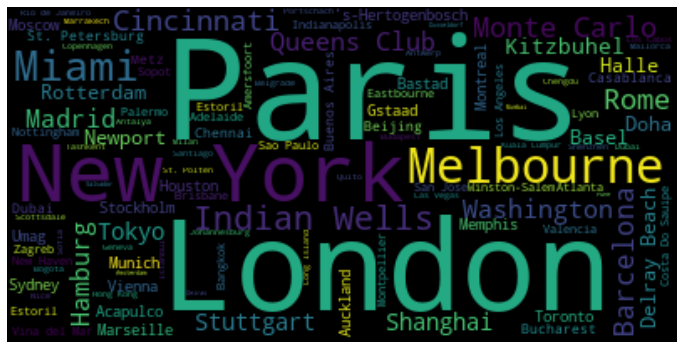

In [76]:
print("**********************************")
print("Location of Tennis Tournament")
print("**********************************")
print(list(df_atp['Location'].unique()))


location_dict = {}
for loc, count in df_atp['Location'].value_counts().reset_index().values:
    location_dict[loc] = count



wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=location_dict)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [77]:
print("****************************")
print("Tennis Tournaments")
print("****************************")
print(list(df_atp['Tournament'].unique()))


****************************
Tennis Tournaments
****************************
['Australian Hardcourt Championships', 'Gold Flake Open', 'Qatar Open', 'Heineken Open', 'Sydney International', 'Australian Open', 'Dubai Open', 'Marseille Open', 'Sybase Open', 'Kroger St. Jude', 'ABN AMRO World Tennis Tournament', 'AXA Cup', 'Mexican Open', 'Copenhagen Open', 'Citrix Tennis Championships', 'Chevrolet Cup', 'Colombia Open', 'Franklin Templeton Tennis Classic', 'Indian Wells TMS', 'Ericsson Open', 'Galleryfurniture.com Tennis Challenge', 'Grand Prix Hassan II', 'Estoril Open', 'Monte Carlo Masters', 'Open Seat Godo', 'Mallorca Open', 'BMW Open', 'U.S. Clay Court Championships', 'Rome TMS', 'Hamburg TMS', 'Internationaler Raiffeisen Grand Prix', 'French Open', 'Gerry Weber Open', 'Stella Artois', 'Nottingham Open', 'Heineken Trophy', 'Wimbledon', 'Swedish Open', 'Gstaad Open', 'Hall of Fame Championships', 'Dutch Open', 'Mercedes Cup', 'Croatia Open', 'Generali Open', 'Mercedes-Benz Cup', "Ten

In [78]:
print("***************************")
print("Types of Tennis Tournament")
print("***************************")
print(list(df_atp['Series'].unique()))

***************************
Types of Tennis Tournament
***************************
['International', 'Grand Slam', 'International Gold', 'Masters', 'Masters Cup', 'ATP250', 'ATP500', 'Masters 1000']


In [79]:
print("****************************")
print("Rounds in Tennis Tournament")
print("****************************")
print(list(df_atp['Round'].unique()))

****************************
Rounds in Tennis Tournament
****************************
['1st Round', '2nd Round', 'Quarterfinals', 'Semifinals', 'The Final', '3rd Round', '4th Round', 'Round Robin']


In [80]:
print("*****************************")
print("Courts in Tennis Tournament")
print("*****************************")
print(list(df_atp['Court'].unique()))


*****************************
Courts in Tennis Tournament
*****************************
['Outdoor', 'Indoor']


In [81]:
print("****************************")
print("Surface in Tennis Tournament")
print("****************************")
print(list(df_atp['Surface'].unique()))

****************************
Surface in Tennis Tournament
****************************
['Hard', 'Clay', 'Grass', 'Carpet']


In [82]:
print("************************************")
print("Best sets type in Tennis Tournament")
print("************************************")
print(list(df_atp['Best of'].unique()))

************************************
Best sets type in Tennis Tournament
************************************
[3, 5]


In [83]:
print("************************************")
print("Match Status Tennis Tournament")
print("************************************")
print(list(df_atp['Comment'].unique()))

************************************
Match Status Tennis Tournament
************************************
['Completed', 'Retired', 'Walkover', 'Disqualified', 'Sched', 'Awarded']


In [84]:
cat_cols = ['Series', 'Court', 'Surface','Round','Best of','Comment']

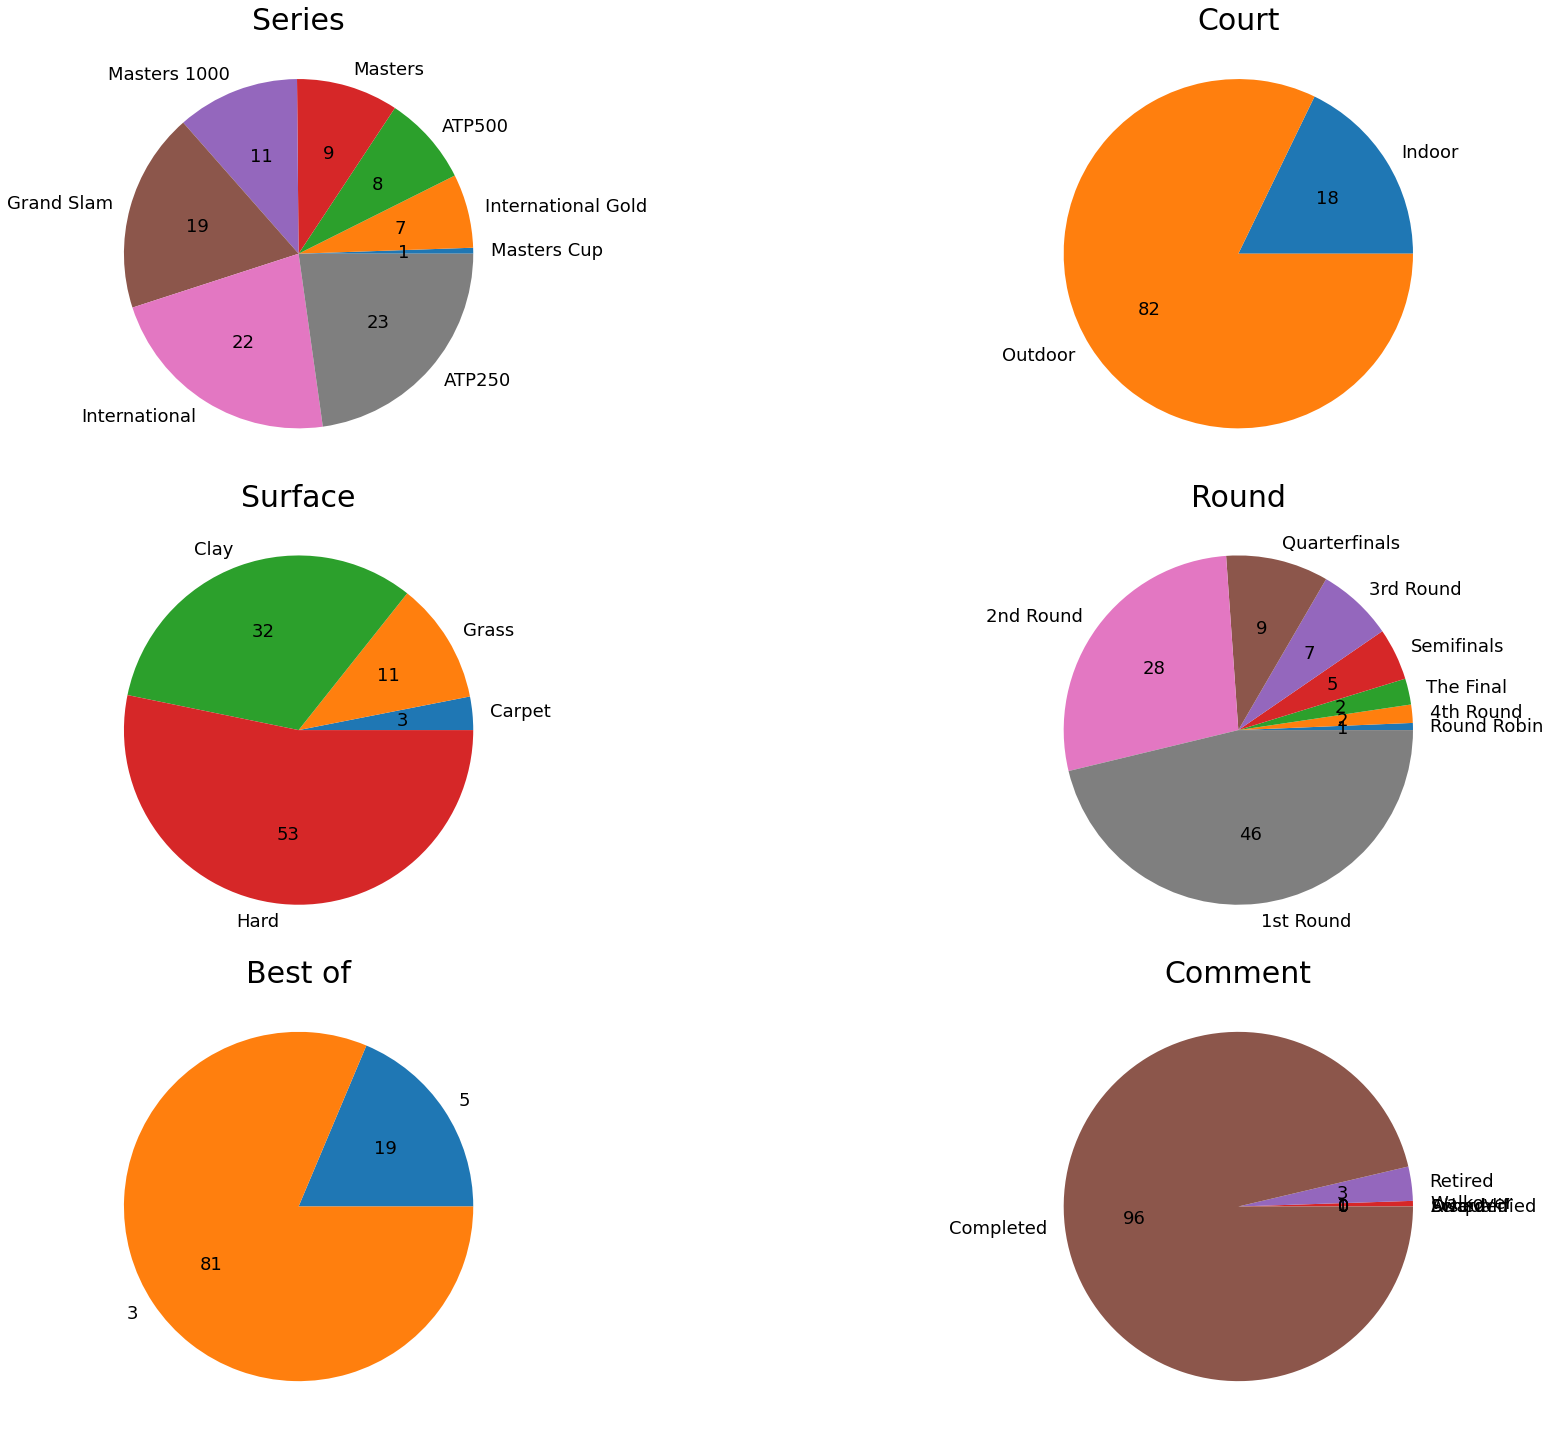

In [85]:
fig, axes = plt.subplots(3, 2, figsize=(30, 20))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(df_atp[cat_cols]):
    _ = df_atp[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=18)
    _ = axes[i].set_ylabel('')
    _ = axes[i].title.set_color("black")
    _ = axes[i].title.set_size(30)
    
_ = plt.tight_layout()

In [86]:
# Creating the rank difference of winner and loser for a relative understanding
df_atp['Players_Rank_Diff'] = df_atp['WRank'] - df_atp['LRank']
df_atp['Players_Rank_Diff']

0        -14.0
1        -51.0
2       -615.0
3        -22.0
4       -117.0
         ...  
54903     -5.0
54904      3.0
54905      3.0
54906     -2.0
54907      1.0
Name: Players_Rank_Diff, Length: 54908, dtype: float64

In [87]:
#Assigning Round Points
# 1 - First Round
# 1 - Round Robin
# 2 - Second Round
# 3 - Third Round
# 4 - Fourth Round
# 5 - Quarter Finals
# 6 - Semi Finals
# 7 - Final

cleanup_round = {"1st Round": 1, "2nd Round": 2, '3rd Round':3, '4th Round':4, 'Quarterfinals':5,'Semifinals':6,
                             'The Final': 7, 'Round Robin': 1}


#df_atp = df_atp['Round'].replace(to_replace = ['1st Round', 'Round Robin','2nd Round','3rd Round','4th Round','Quarterfinals','Semifinals','The Final'],
#                                          value =['1','1','2','3','4','5','6','7'], inplace=True)

df_atp['Round'] = df_atp['Round'].map(cleanup_round)
df_atp['Round']


0        1
1        1
2        1
3        1
4        1
        ..
54903    1
54904    1
54905    6
54906    6
54907    7
Name: Round, Length: 54908, dtype: int64

In [88]:
# Replacing Winner as Player1 and Loser as Player2 and adding one more column Winner_Game to understand who won the game

df_atp['Player1'] = df_atp['Winner']
df_atp['Player2'] = df_atp['Loser']


df_atp['Winner_Game'] = df_atp['Winner']
df_atp

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,B365W,B365L,ID,Year,Player1MatchVictory%,Player1GameVictory%,Player1SetVictory%,Player2MatchVictory%,Player2GameVictory%,Player2SetVictory%,Players_Rank_Diff,Player1,Player2,Winner_Game
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Dosedel S.,Ljubicic I.,63.0,77.0,6.0,4.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,0.00,0.00,1,2000,0.00,0.00,0.00,0.00,0.00,0.00,-14.0,Dosedel S.,Ljubicic I.,Dosedel S.
1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Enqvist T.,Clement A.,5.0,56.0,6.0,3.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,0.00,0.00,2,2000,0.00,0.00,0.00,0.00,0.00,0.00,-51.0,Enqvist T.,Clement A.,Enqvist T.
2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Escude N.,Baccanello P.,40.0,655.0,6.0,7.0,7.0,5.0,6.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,0.00,0.00,3,2000,0.00,0.00,0.00,0.00,0.00,0.00,-615.0,Escude N.,Baccanello P.,Escude N.
3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Federer R.,Knippschild J.,65.0,87.0,6.0,1.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,0.00,0.00,4,2000,0.00,0.00,0.00,0.00,0.00,0.00,-22.0,Federer R.,Knippschild J.,Federer R.
4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Fromberg R.,Woodbridge T.,81.0,198.0,7.0,6.0,5.0,7.0,6.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,0.00,0.00,5,2000,0.00,0.00,0.00,0.00,0.00,0.00,-117.0,Fromberg R.,Woodbridge T.,Fromberg R.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54903,66,London,Masters Cup,2019-11-15,Masters Cup,Indoor,Hard,1,3,Nadal R.,Tsitsipas S.,1.0,6.0,6.0,7.0,6.0,4.0,7.0,5.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,1.44,2.75,54904,2019,50.00,76.00,100.00,0.00,0.00,0.00,-5.0,Nadal R.,Tsitsipas S.,Nadal R.
54904,66,London,Masters Cup,2019-11-15,Masters Cup,Indoor,Hard,1,3,Zverev A.,Medvedev D.,7.0,4.0,6.0,4.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.90,1.90,54905,2019,50.00,70.59,100.00,100.00,100.00,100.00,3.0,Zverev A.,Medvedev D.,Zverev A.
54905,66,London,Masters Cup,2019-11-16,Masters Cup,Indoor,Hard,6,3,Tsitsipas S.,Federer R.,6.0,3.0,6.0,3.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,3.50,1.30,54906,2019,66.67,60.98,80.00,25.00,22.92,7.69,3.0,Tsitsipas S.,Federer R.,Tsitsipas S.
54906,66,London,Masters Cup,2019-11-16,Masters Cup,Indoor,Hard,6,3,Thiem D.,Zverev A.,5.0,7.0,7.0,5.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.80,2.00,54907,2019,66.67,78.57,100.00,33.33,16.67,0.00,-2.0,Thiem D.,Zverev A.,Thiem D.


In [89]:
# We want to Swap the Player 1, Player 2 columns for certain records to create a balanced dataset
# Normal Case: Player1 Vs Player 2  Winner: Player1
# After Swapping , if it is Player1 Vs Player 2, Winner : Player1, if it is Player2 Vs Player1, Winner : Player 2

X = df_atp[["Player1", "Player2"]]
y = df_atp[['Winner_Game']]

print(X)
print(y)

             Player1         Player2
0         Dosedel S.     Ljubicic I.
1         Enqvist T.      Clement A.
2          Escude N.   Baccanello P.
3         Federer R.  Knippschild J.
4        Fromberg R.   Woodbridge T.
...              ...             ...
54903      Nadal R.    Tsitsipas S. 
54904     Zverev A.     Medvedev D. 
54905  Tsitsipas S.      Federer R. 
54906      Thiem D.       Zverev A. 
54907  Tsitsipas S.        Thiem D. 

[54908 rows x 2 columns]
         Winner_Game
0         Dosedel S.
1         Enqvist T.
2          Escude N.
3         Federer R.
4        Fromberg R.
...              ...
54903      Nadal R. 
54904     Zverev A. 
54905  Tsitsipas S. 
54906      Thiem D. 
54907  Tsitsipas S. 

[54908 rows x 1 columns]


In [90]:
# Rabdomly swapping Player1 and Player 2

import random
for i in range(X.shape[0]):
    rand = random.getrandbits(1)
    if rand == True:
        X.iloc[i][0], X.iloc[i][1] = X.iloc[i][1], X.iloc[i][0]
print(X)        

              Player1        Player2
0          Dosedel S.    Ljubicic I.
1          Enqvist T.     Clement A.
2           Escude N.  Baccanello P.
3      Knippschild J.     Federer R.
4       Woodbridge T.    Fromberg R.
...               ...            ...
54903   Tsitsipas S.       Nadal R. 
54904      Zverev A.    Medvedev D. 
54905   Tsitsipas S.     Federer R. 
54906      Zverev A.       Thiem D. 
54907   Tsitsipas S.       Thiem D. 

[54908 rows x 2 columns]


In [91]:
# If there is no swap for a record, Winner_Game = 1, else Winner_Game = 0

y1 = pd.DataFrame(data=np.zeros(shape= (len(y),1)), columns= ['Winner_Game'], dtype= np.int64)
for i in y.index:
    if y['Winner_Game'][i] == X['Player1'][i]:
        y1['Winner_Game'][i] = 1
y = y1
print(y)
print(y.value_counts())

# The shuffling created is balanced

       Winner_Game
0                1
1                1
2                1
3                0
4                0
...            ...
54903            0
54904            1
54905            1
54906            0
54907            1

[54908 rows x 1 columns]
Winner_Game
1              27556
0              27352
dtype: int64


In [92]:
print("******************************************************************************")
print("              Before Swapping the relevant columns                             ")
print("******************************************************************************")
df_atp

******************************************************************************
              Before Swapping the relevant columns                             
******************************************************************************


,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,B365W,B365L,ID,Year,Player1MatchVictory%,Player1GameVictory%,Player1SetVictory%,Player2MatchVictory%,Player2GameVictory%,Player2SetVictory%,Players_Rank_Diff,Player1,Player2,Winner_Game
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Dosedel S.,Ljubicic I.,63.0,77.0,6.0,4.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,0.00,0.00,1,2000,0.00,0.00,0.00,0.00,0.00,0.00,-14.0,Dosedel S.,Ljubicic I.,Dosedel S.
1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Enqvist T.,Clement A.,5.0,56.0,6.0,3.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,0.00,0.00,2,2000,0.00,0.00,0.00,0.00,0.00,0.00,-51.0,Enqvist T.,Clement A.,Enqvist T.
2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Escude N.,Baccanello P.,40.0,655.0,6.0,7.0,7.0,5.0,6.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,0.00,0.00,3,2000,0.00,0.00,0.00,0.00,0.00,0.00,-615.0,Escude N.,Baccanello P.,Escude N.
3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Federer R.,Knippschild J.,65.0,87.0,6.0,1.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,0.00,0.00,4,2000,0.00,0.00,0.00,0.00,0.00,0.00,-22.0,Federer R.,Knippschild J.,Federer R.
4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Fromberg R.,Woodbridge T.,81.0,198.0,7.0,6.0,5.0,7.0,6.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,0.00,0.00,5,2000,0.00,0.00,0.00,0.00,0.00,0.00,-117.0,Fromberg R.,Woodbridge T.,Fromberg R.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54903,66,London,Masters Cup,2019-11-15,Masters Cup,Indoor,Hard,1,3,Nadal R.,Tsitsipas S.,1.0,6.0,6.0,7.0,6.0,4.0,7.0,5.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,1.44,2.75,54904,2019,50.00,76.00,100.00,0.00,0.00,0.00,-5.0,Nadal R.,Tsitsipas S.,Nadal R.
54904,66,London,Masters Cup,2019-11-15,Masters Cup,Indoor,Hard,1,3,Zverev A.,Medvedev D.,7.0,4.0,6.0,4.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.90,1.90,54905,2019,50.00,70.59,100.00,100.00,100.00,100.00,3.0,Zverev A.,Medvedev D.,Zverev A.
54905,66,London,Masters Cup,2019-11-16,Masters Cup,Indoor,Hard,6,3,Tsitsipas S.,Federer R.,6.0,3.0,6.0,3.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,3.50,1.30,54906,2019,66.67,60.98,80.00,25.00,22.92,7.69,3.0,Tsitsipas S.,Federer R.,Tsitsipas S.
54906,66,London,Masters Cup,2019-11-16,Masters Cup,Indoor,Hard,6,3,Thiem D.,Zverev A.,5.0,7.0,7.0,5.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.80,2.00,54907,2019,66.67,78.57,100.00,33.33,16.67,0.00,-2.0,Thiem D.,Zverev A.,Thiem D.


In [93]:
%%time 

# Swapping Only relevant columns records for a player when Winner_Game = 0 
# Columns are : - Player1, Player2, (Players_Rank_Diff*-1), Player1MatchVictory%, Player1GameVictory%, Player1SetVictory%,
#                 Player2MatchVictory%, Player2GameVictory%, Player2SetVictory%, Booking Odds(AvgW, AvgL)          

print("******************************************************************************")
print("                  Swapping in Progress.Please be Patient                     ")
print("******************************************************************************")

 # Creating a new column Has_Player1_Won 
 # 1 indicates Player1 Won
 # 0 indicates Player1 Lost

df_atp['Has_Player1_Won'] = y['Winner_Game']  
#print(df_atp['Winner_Game'])
for i in range(0, len(df_atp)):
    temp_MatchVictory= 0
    temp_GameVictory = 0
    temp_SetVictory = 0
    winner_game = df_atp.loc[i,'Has_Player1_Won']
    #print(winner_game)
    if (winner_game==1):
        df_atp.loc[i,'Player1'] = df_atp.loc[i,'Winner']
        df_atp.loc[i,'Player2'] = df_atp.loc[i,'Loser']
        df_atp.loc[i,'B365W'] = df_atp.loc[i,'B365W']
        df_atp.loc[i,'B365L'] = df_atp.loc[i,'B365W']
    elif (winner_game==0):
        df_atp.loc[i,'Player1'] = df_atp.loc[i,'Loser']
        df_atp.loc[i,'Player2'] = df_atp.loc[i,'Winner']
        df_atp.loc[i,'Players_Rank_Diff'] = (df_atp.loc[i,'Players_Rank_Diff'] * -1)
        temp_MatchVictory = df_atp.loc[i,'Player1MatchVictory%']
        temp_GameVictory = df_atp.loc[i,'Player1GameVictory%']
        temp_SetVictory = df_atp.loc[i,'Player1SetVictory%']
        df_atp.loc[i,'Player1MatchVictory%'] = df_atp.loc[i,'Player2MatchVictory%']
        df_atp.loc[i,'Player1GameVictory%'] = df_atp.loc[i,'Player2GameVictory%']
        df_atp.loc[i,'Player1SetVictory%'] = df_atp.loc[i,'Player2SetVictory%']
        df_atp.loc[i,'Player2MatchVictory%'] = temp_MatchVictory
        df_atp.loc[i,'Player2GameVictory%'] = temp_GameVictory
        df_atp.loc[i,'Player2SetVictory%'] = temp_SetVictory
        temp_avgw = df_atp.loc[i,'B365W']
        df_atp.loc[i,'B365W'] = df_atp.loc[i,'B365L']
        df_atp.loc[i,'B365L'] = temp_avgw
        
print("******************************************************************************")
print("                                  Completed                                   ")
print("******************************************************************************")        

******************************************************************************
                  Swapping in Progress.Please be Patient                     
******************************************************************************
******************************************************************************
                                  Completed                                   
******************************************************************************
CPU times: user 4min 5s, sys: 3.6 s, total: 4min 8s
Wall time: 4min 8s


In [94]:
print("******************************************************************************")
print("              After Swapping the relevant columns                             ")
print("******************************************************************************")
df_atp

******************************************************************************
              After Swapping the relevant columns                             
******************************************************************************


,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,B365W,B365L,ID,Year,Player1MatchVictory%,Player1GameVictory%,Player1SetVictory%,Player2MatchVictory%,Player2GameVictory%,Player2SetVictory%,Players_Rank_Diff,Player1,Player2,Winner_Game,Has_Player1_Won
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Dosedel S.,Ljubicic I.,63.0,77.0,6.0,4.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,0.00,0.00,1,2000,0.00,0.00,0.00,0.00,0.00,0.00,-14.0,Dosedel S.,Ljubicic I.,Dosedel S.,1
1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Enqvist T.,Clement A.,5.0,56.0,6.0,3.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,0.00,0.00,2,2000,0.00,0.00,0.00,0.00,0.00,0.00,-51.0,Enqvist T.,Clement A.,Enqvist T.,1
2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Escude N.,Baccanello P.,40.0,655.0,6.0,7.0,7.0,5.0,6.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,0.00,0.00,3,2000,0.00,0.00,0.00,0.00,0.00,0.00,-615.0,Escude N.,Baccanello P.,Escude N.,1
3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Federer R.,Knippschild J.,65.0,87.0,6.0,1.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,0.00,0.00,4,2000,0.00,0.00,0.00,0.00,0.00,0.00,22.0,Knippschild J.,Federer R.,Federer R.,0
4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Fromberg R.,Woodbridge T.,81.0,198.0,7.0,6.0,5.0,7.0,6.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,0.00,0.00,5,2000,0.00,0.00,0.00,0.00,0.00,0.00,117.0,Woodbridge T.,Fromberg R.,Fromberg R.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54903,66,London,Masters Cup,2019-11-15,Masters Cup,Indoor,Hard,1,3,Nadal R.,Tsitsipas S.,1.0,6.0,6.0,7.0,6.0,4.0,7.0,5.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,2.75,1.44,54904,2019,0.00,0.00,0.00,50.00,76.00,100.00,5.0,Tsitsipas S.,Nadal R.,Nadal R.,0
54904,66,London,Masters Cup,2019-11-15,Masters Cup,Indoor,Hard,1,3,Zverev A.,Medvedev D.,7.0,4.0,6.0,4.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.90,1.90,54905,2019,50.00,70.59,100.00,100.00,100.00,100.00,3.0,Zverev A.,Medvedev D.,Zverev A.,1
54905,66,London,Masters Cup,2019-11-16,Masters Cup,Indoor,Hard,6,3,Tsitsipas S.,Federer R.,6.0,3.0,6.0,3.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,3.50,3.50,54906,2019,66.67,60.98,80.00,25.00,22.92,7.69,3.0,Tsitsipas S.,Federer R.,Tsitsipas S.,1
54906,66,London,Masters Cup,2019-11-16,Masters Cup,Indoor,Hard,6,3,Thiem D.,Zverev A.,5.0,7.0,7.0,5.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,2.00,1.80,54907,2019,33.33,16.67,0.00,66.67,78.57,100.00,2.0,Zverev A.,Thiem D.,Thiem D.,0


In [95]:
# Mapping Player's name with Player ID

df_atp['Player1'] = df_atp['Player1'].map(players_id)
df_atp['Player2'] = df_atp['Player2'].map(players_id)

In [96]:

df_atp['Winner_Game'] = df_atp.apply(lambda x: x['Player1'] if x['Has_Player1_Won']==1 else x['Player2'], axis=1 )

In [97]:
df_atp

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,B365W,B365L,ID,Year,Player1MatchVictory%,Player1GameVictory%,Player1SetVictory%,Player2MatchVictory%,Player2GameVictory%,Player2SetVictory%,Players_Rank_Diff,Player1,Player2,Winner_Game,Has_Player1_Won
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Dosedel S.,Ljubicic I.,63.0,77.0,6.0,4.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,0.00,0.00,1,2000,0.00,0.00,0.00,0.00,0.00,0.00,-14.0,1,67,1,1
1,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Enqvist T.,Clement A.,5.0,56.0,6.0,3.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,0.00,0.00,2,2000,0.00,0.00,0.00,0.00,0.00,0.00,-51.0,2,60,2,1
2,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Escude N.,Baccanello P.,40.0,655.0,6.0,7.0,7.0,5.0,6.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,0.00,0.00,3,2000,0.00,0.00,0.00,0.00,0.00,0.00,-615.0,3,361,3,1
3,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Federer R.,Knippschild J.,65.0,87.0,6.0,1.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,0.00,0.00,4,2000,0.00,0.00,0.00,0.00,0.00,0.00,22.0,181,4,4,0
4,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1,3,Fromberg R.,Woodbridge T.,81.0,198.0,7.0,6.0,5.0,7.0,6.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,0.00,0.00,5,2000,0.00,0.00,0.00,0.00,0.00,0.00,117.0,94,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54903,66,London,Masters Cup,2019-11-15,Masters Cup,Indoor,Hard,1,3,Nadal R.,Tsitsipas S.,1.0,6.0,6.0,7.0,6.0,4.0,7.0,5.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,2.75,1.44,54904,2019,0.00,0.00,0.00,50.00,76.00,100.00,5.0,973,975,975,0
54904,66,London,Masters Cup,2019-11-15,Masters Cup,Indoor,Hard,1,3,Zverev A.,Medvedev D.,7.0,4.0,6.0,4.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.90,1.90,54905,2019,50.00,70.59,100.00,100.00,100.00,100.00,3.0,974,1521,974,1
54905,66,London,Masters Cup,2019-11-16,Masters Cup,Indoor,Hard,6,3,Tsitsipas S.,Federer R.,6.0,3.0,6.0,3.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,3.50,3.50,54906,2019,66.67,60.98,80.00,25.00,22.92,7.69,3.0,973,631,973,1
54906,66,London,Masters Cup,2019-11-16,Masters Cup,Indoor,Hard,6,3,Thiem D.,Zverev A.,5.0,7.0,7.0,5.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,2.00,1.80,54907,2019,33.33,16.67,0.00,66.67,78.57,100.00,2.0,974,972,972,0


In [99]:
# Dropping all the irrelevant columns regarding betting odds, ranks and sets (we have already extracted features from it)

dataset_copy = df_atp.copy()

cols_to_drop = ['ATP','Location','Tournament','Date','Best of','Winner','Loser',
                'W1','W2','W3','W4','W5','L1','L2','L3','L4','L5',
                'Wsets','Lsets', 'WRank','LRank']

for col in cols_to_drop:
    dataset_copy = dataset_copy.drop(col,axis=1)

In [100]:
# One hot encoding for categorical variables
CAT_COLS = ['Series','Court','Surface','Comment']
dataset_copy = pd.get_dummies(dataset_copy, columns = CAT_COLS)

In [101]:
# Seperating the data into dataset based on Year from 2000-2016 (for training),  dataset 2017 and dataset 2018 (for evaluation)

dataset_2000_2016 = dataset_copy[((dataset_copy['Year'] >= 2000) & (dataset_copy['Year'] <= 2016) )]
dataset_2017 = dataset_copy[dataset_copy['Year'] == 2017]
dataset_2018 = dataset_copy[dataset_copy['Year'] == 2018]
dataset_2019 = dataset_copy[dataset_copy['Year'] == 2019]

In [102]:
dataset_2000_2016

,Round,B365W,B365L,ID,Year,Player1MatchVictory%,Player1GameVictory%,Player1SetVictory%,Player2MatchVictory%,Player2GameVictory%,Player2SetVictory%,Players_Rank_Diff,Player1,Player2,Winner_Game,Has_Player1_Won,Series_ATP250,Series_ATP500,Series_Grand Slam,Series_International,Series_International Gold,Series_Masters,Series_Masters 1000,Series_Masters Cup,Court_Indoor,Court_Outdoor,Surface_Carpet,Surface_Clay,Surface_Grass,Surface_Hard,Comment_Awarded,Comment_Completed,Comment_Disqualified,Comment_Retired,Comment_Sched,Comment_Walkover
0,1,0.00,0.00,1,2000,0.00,0.00,0.00,0.00,0.00,0.00,-14.0,1,67,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,1,0.00,0.00,2,2000,0.00,0.00,0.00,0.00,0.00,0.00,-51.0,2,60,2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2,1,0.00,0.00,3,2000,0.00,0.00,0.00,0.00,0.00,0.00,-615.0,3,361,3,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,1,0.00,0.00,4,2000,0.00,0.00,0.00,0.00,0.00,0.00,22.0,181,4,4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,1,0.00,0.00,5,2000,0.00,0.00,0.00,0.00,0.00,0.00,117.0,94,5,5,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47023,1,1.28,1.28,47024,2016,77.17,82.95,93.87,36.14,28.51,11.43,-2.0,457,368,457,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
47024,1,1.57,2.37,47025,2016,33.17,21.33,5.78,64.64,73.04,90.62,-2.0,551,481,481,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
47025,6,4.50,1.20,47026,2016,32.14,26.14,8.43,77.20,82.97,93.87,3.0,694,457,457,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
47026,6,1.22,1.22,47027,2016,83.28,86.86,95.73,33.33,21.49,5.93,-3.0,435,551,435,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0


In [103]:
dataset_2017

,Round,B365W,B365L,ID,Year,Player1MatchVictory%,Player1GameVictory%,Player1SetVictory%,Player2MatchVictory%,Player2GameVictory%,Player2SetVictory%,Players_Rank_Diff,Player1,Player2,Winner_Game,Has_Player1_Won,Series_ATP250,Series_ATP500,Series_Grand Slam,Series_International,Series_International Gold,Series_Masters,Series_Masters 1000,Series_Masters Cup,Court_Indoor,Court_Outdoor,Surface_Carpet,Surface_Clay,Surface_Grass,Surface_Hard,Comment_Awarded,Comment_Completed,Comment_Disqualified,Comment_Retired,Comment_Sched,Comment_Walkover
47028,1,3.50,1.28,47029,2017,75.00,64.18,33.33,21.43,20.81,42.86,81.0,806,849,849,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
47029,1,1.50,1.50,47030,2017,44.57,53.05,83.17,62.89,50.87,22.33,-15.0,246,402,246,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
47030,1,1.80,1.90,47031,2017,48.92,36.72,14.67,67.07,75.47,91.65,5.0,605,317,317,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
47031,1,1.36,1.36,47032,2017,40.38,52.67,83.33,66.67,56.76,20.00,-96.0,774,864,774,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
47032,1,2.75,1.40,47033,2017,50.27,42.14,16.00,59.12,66.48,87.89,16.0,746,612,612,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49658,6,9.00,9.00,49659,2017,59.33,69.41,89.23,17.09,14.88,5.47,6.0,697,4,697,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
49659,6,1.40,1.40,49660,2017,61.08,67.86,88.09,39.52,33.07,13.61,-3.0,612,721,612,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
49660,7,3.25,1.33,49661,2017,40.53,30.48,10.72,61.18,67.96,88.13,2.0,697,612,612,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
49661,1,2.20,2.20,49662,2017,52.24,61.15,83.55,51.41,42.69,19.23,143.0,628,765,628,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [104]:
dataset_2018

,Round,B365W,B365L,ID,Year,Player1MatchVictory%,Player1GameVictory%,Player1SetVictory%,Player2MatchVictory%,Player2GameVictory%,Player2SetVictory%,Players_Rank_Diff,Player1,Player2,Winner_Game,Has_Player1_Won,Series_ATP250,Series_ATP500,Series_Grand Slam,Series_International,Series_International Gold,Series_Masters,Series_Masters 1000,Series_Masters Cup,Court_Indoor,Court_Outdoor,Surface_Carpet,Surface_Clay,Surface_Grass,Surface_Hard,Comment_Awarded,Comment_Completed,Comment_Disqualified,Comment_Retired,Comment_Sched,Comment_Walkover
49663,1,1.61,1.61,49664,2018,42.40,51.04,80.17,52.79,43.24,17.31,-5.0,573,592,573,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
49664,1,2.50,2.50,49665,2018,34.88,46.56,78.81,76.32,70.26,44.44,-3.0,661,843,661,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
49665,1,1.40,1.40,49666,2018,41.73,53.58,80.84,75.00,70.71,37.50,-185.0,498,833,498,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
49666,1,2.20,2.20,49667,2018,39.90,49.69,81.87,63.33,54.69,23.33,-54.0,623,864,623,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
49667,1,1.83,1.83,49668,2018,67.50,60.26,37.78,44.59,53.07,79.27,40.0,849,819,819,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52356,1,2.37,2.37,52357,2018,44.22,56.43,82.43,55.74,46.13,20.29,-73.0,550,795,550,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
52357,1,1.72,2.00,52358,2018,69.05,58.86,32.18,43.48,55.19,83.33,17.0,805,840,840,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
52358,1,1.50,1.50,52359,2018,31.91,40.79,70.59,58.67,48.62,22.08,15.0,696,535,696,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
52359,1,1.66,1.66,52360,2018,31.58,41.67,70.59,80.00,61.54,0.00,-7.0,910,931,910,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [105]:
dataset_2019

,Round,B365W,B365L,ID,Year,Player1MatchVictory%,Player1GameVictory%,Player1SetVictory%,Player2MatchVictory%,Player2GameVictory%,Player2SetVictory%,Players_Rank_Diff,Player1,Player2,Winner_Game,Has_Player1_Won,Series_ATP250,Series_ATP500,Series_Grand Slam,Series_International,Series_International Gold,Series_Masters,Series_Masters 1000,Series_Masters Cup,Court_Indoor,Court_Outdoor,Surface_Carpet,Surface_Clay,Surface_Grass,Surface_Hard,Comment_Awarded,Comment_Completed,Comment_Disqualified,Comment_Retired,Comment_Sched,Comment_Walkover
52303,1,2.62,2.62,52304,2019,35.96,47.12,76.92,51.43,45.52,21.05,14.0,684,831,684,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
52304,1,2.10,2.10,52305,2019,49.18,59.80,86.33,57.14,49.60,22.62,-17.0,494,775,494,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
52305,1,1.28,1.28,52306,2019,76.66,82.41,93.51,67.19,61.09,36.99,6.0,457,730,457,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
52306,1,1.40,1.40,52307,2019,63.27,70.48,87.86,56.37,47.95,18.86,-27.0,770,573,770,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
52307,1,1.57,2.25,52308,2019,62.07,53.95,27.27,67.94,74.87,90.83,-93.0,792,433,433,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54903,1,2.75,1.44,54904,2019,0.00,0.00,0.00,50.00,76.00,100.00,5.0,973,975,975,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
54904,1,1.90,1.90,54905,2019,50.00,70.59,100.00,100.00,100.00,100.00,3.0,974,1521,974,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
54905,6,3.50,3.50,54906,2019,66.67,60.98,80.00,25.00,22.92,7.69,3.0,973,631,973,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
54906,6,2.00,1.80,54907,2019,33.33,16.67,0.00,66.67,78.57,100.00,2.0,974,972,972,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0


In [106]:
#Downloading the new datasets (if required for additional exploration)

compression_opts = dict(method='zip',
                        archive_name='dataset_2000_2016.csv')  
dataset_2000_2016.to_csv('dataset_2000_2016.zip', index=False,
          compression=compression_opts)

In [107]:
compression_opts = dict(method='zip',
                        archive_name='dataset_2017.csv')  
dataset_2017.to_csv('dataset_2017.zip', index=False,
          compression=compression_opts)

In [108]:
compression_opts = dict(method='zip',
                        archive_name='dataset_2018.csv')  
dataset_2018.to_csv('dataset_2018.zip', index=False,
          compression=compression_opts)

In [109]:
compression_opts = dict(method='zip',
                        archive_name='dataset_2019.csv')  
dataset_2019.to_csv('dataset_2019.zip', index=False,
          compression=compression_opts)

In [110]:
cols_to_drop = ['ID','Year','Player1','Player2','Winner_Game']

for col in cols_to_drop:
    dataset_2000_2016 = dataset_2000_2016.drop(col,axis=1)
    dataset_2017 = dataset_2017.drop(col,axis=1)
    dataset_2018 = dataset_2018.drop(col,axis=1)   
    dataset_2019 = dataset_2019.drop(col,axis=1) 

In [111]:
# Creating train dataset and test datasets

train_data = dataset_2000_2016
test_data_2017 = dataset_2017
test_data_2018 = dataset_2018
test_data_2019 = dataset_2019

In [112]:
train_data.columns

Index(['Round', 'B365W', 'B365L', 'Player1MatchVictory%',
       'Player1GameVictory%', 'Player1SetVictory%', 'Player2MatchVictory%',
       'Player2GameVictory%', 'Player2SetVictory%', 'Players_Rank_Diff',
       'Has_Player1_Won', 'Series_ATP250', 'Series_ATP500',
       'Series_Grand Slam', 'Series_International',
       'Series_International Gold', 'Series_Masters', 'Series_Masters 1000',
       'Series_Masters Cup', 'Court_Indoor', 'Court_Outdoor', 'Surface_Carpet',
       'Surface_Clay', 'Surface_Grass', 'Surface_Hard', 'Comment_Awarded',
       'Comment_Completed', 'Comment_Disqualified', 'Comment_Retired',
       'Comment_Sched', 'Comment_Walkover'],
      dtype='object')

In [113]:
train_data['Has_Player1_Won'].value_counts()

1    23667
0    23361
Name: Has_Player1_Won, dtype: int64

In [114]:
test_data_2017['Has_Player1_Won'].value_counts()

1    1330
0    1305
Name: Has_Player1_Won, dtype: int64

In [115]:
test_data_2018['Has_Player1_Won'].value_counts()

0    1372
1    1280
Name: Has_Player1_Won, dtype: int64

In [116]:
test_data_2019['Has_Player1_Won'].value_counts()

0    1314
1    1279
Name: Has_Player1_Won, dtype: int64

In [117]:
#train_data_encoded.isna().sum()
# If Still there are any null values filing it with zero before training

train_data_encoded = train_data.fillna(0,axis=1)
train_data_encoded

,Round,B365W,B365L,Player1MatchVictory%,Player1GameVictory%,Player1SetVictory%,Player2MatchVictory%,Player2GameVictory%,Player2SetVictory%,Players_Rank_Diff,Has_Player1_Won,Series_ATP250,Series_ATP500,Series_Grand Slam,Series_International,Series_International Gold,Series_Masters,Series_Masters 1000,Series_Masters Cup,Court_Indoor,Court_Outdoor,Surface_Carpet,Surface_Clay,Surface_Grass,Surface_Hard,Comment_Awarded,Comment_Completed,Comment_Disqualified,Comment_Retired,Comment_Sched,Comment_Walkover
0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-14.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-51.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
2,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-615.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,117.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47023,1,1.28,1.28,77.17,82.95,93.87,36.14,28.51,11.43,-2.0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
47024,1,1.57,2.37,33.17,21.33,5.78,64.64,73.04,90.62,-2.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
47025,6,4.50,1.20,32.14,26.14,8.43,77.20,82.97,93.87,3.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
47026,6,1.22,1.22,83.28,86.86,95.73,33.33,21.49,5.93,-3.0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0


In [118]:
# If Still there are any null values filing it with zero

test_data_2017_encoded = test_data_2017.fillna(0,axis=1)
test_data_2018_encoded = test_data_2018.fillna(0,axis=1)
test_data_2019_encoded = test_data_2019.fillna(0,axis=1)

In [119]:
# Dropping Target Column from test datasets and saving

TARGET_COL = 'Has_Player1_Won'

target_test_2017 = test_data_2017_encoded[TARGET_COL]
target_test_2018 = test_data_2018_encoded[TARGET_COL]
target_test_2019 = test_data_2019_encoded[TARGET_COL]

test_data_2017_encoded = test_data_2017_encoded.drop(TARGET_COL,axis=1)
test_data_2018_encoded = test_data_2018_encoded.drop(TARGET_COL,axis=1)
test_data_2019_encoded = test_data_2019_encoded.drop(TARGET_COL,axis=1)


In [120]:
# Seperating Numerical Columns, Categorical Columns and Features(Numerical + Categorical)

FEATURES = [c for c in train_data_encoded.columns if c not in [TARGET_COL]]
NUM_COLS = ['B365W','B365L','Player1MatchVictory%','Player1GameVictory%','Player1SetVictory%','Player2MatchVictory%',
            'Player2GameVictory%','Player2SetVictory%','Players_Rank_Diff']
CAT_COLS = [c for c in train_data_encoded.columns if c not in [NUM_COLS,TARGET_COL]]
           

In [121]:
# Splitting the train dataset into training and validation sets

from sklearn.model_selection import train_test_split

trn, val = train_test_split(train_data_encoded, test_size=0.2, random_state = 1, stratify = train_data_encoded[TARGET_COL])

###### Input to our model will be the features
trn_features, val_features = trn[FEATURES], val[FEATURES]

###### Output of our model will be the TARGET_COL
trn_target, val_target = trn[TARGET_COL], val[TARGET_COL]

In [122]:
# Normalizing the numerical features with StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
_ = scaler.fit(trn_features)

trn_features = scaler.transform(trn_features)
val_features = scaler.transform(val_features)

**Model 1: - Baseline Model with Decision Tree Classifier**

In [123]:
from sklearn.tree import DecisionTreeClassifier

model_baseline = DecisionTreeClassifier(random_state = 1)
_ = model_baseline.fit(trn[FEATURES], trn[TARGET_COL])

In [124]:
# Function for measuring performance of the model with evaluation metrics


from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

global accuracy
global precision
global recall
global f1score
global false_positive_rate
global true_positive_rate
global roc_auc

def modelPerformance(model,features,target):

  accuracy = 0
  precision = 0
  recall = 0
  f1score = 0
  false_positive_rate = 0
  thresholds = 0
  true_positive_rate = 0
  roc_auc = 0

  prob_clf = model.predict_proba(features)[:,1] # This will give you positive class prediction probabilities  
  pred_clf = np.where(prob_clf > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

  #confusion_matrix = confusion_matrix(target, pred_clf)
  #print(confusion_matrix)

  plot_confusion_matrix(target, pred_clf,figsize=(8,8))

  accuracy = accuracy_score(target, pred_clf)
  precision = precision_score(target, pred_clf)
  recall = recall_score(target, pred_clf)
  f1score = f1_score(target, pred_clf)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(target, prob_clf)
  roc_auc = auc(false_positive_rate, true_positive_rate)

  print("Accuracy: ",accuracy )
  print("Precision: ",precision )
  print("Recall: ",recall )
  print("F1Score: ",f1score )
  print("Area under ROC Curve: ", roc_auc)

  plt.figure(figsize=(6,6))
  plt.title('Receiver Operating Characteristic Curve')
  plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],linestyle='--')
  plt.axis('tight')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

Accuracy:  0.538886821540588
Precision:  0.5225751317476143
Recall:  0.9689431151956901
F1Score:  0.6789666530959695
Area under ROC Curve:  0.5360794552916757


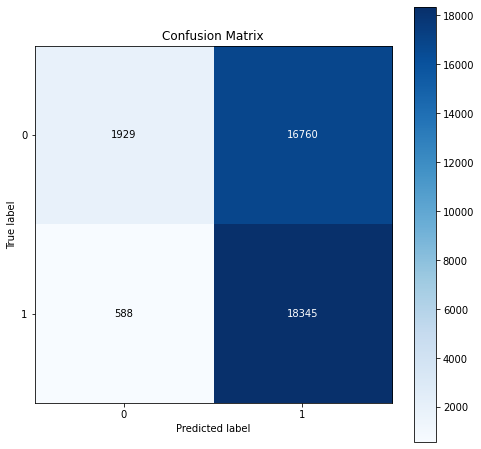

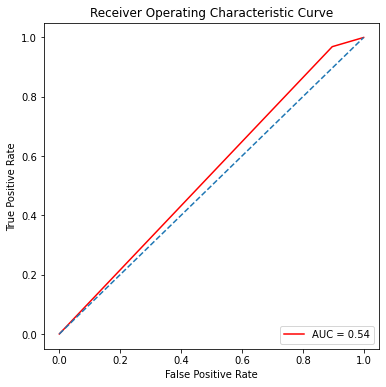

Accuracy:  0.5405060599617265
Precision:  0.5234037718700295
Recall:  0.9731727925644276
F1Score:  0.6807033096926713
Area under ROC Curve:  0.5376351976520768


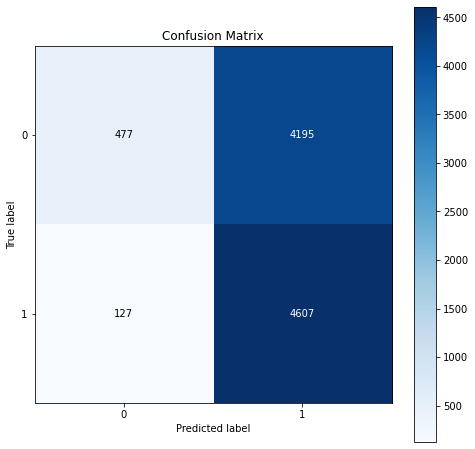

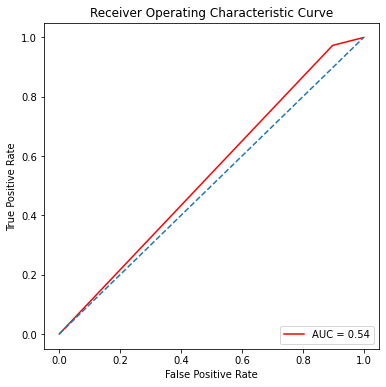

In [125]:
_ = modelPerformance(model_baseline,trn_features,trn_target)
_ = modelPerformance(model_baseline,val_features,val_target)

**Baseline Model gave close to 50% Accuracy**

**Model 2 : Decision Tree Classifier with HyperParameters tuned**

Accuracy:  0.9916272393812131
Precision:  0.9946333687566419
Recall:  0.9886969841018328
F1Score:  0.9916562922151881
Area under ROC Curve:  0.9996199710547884


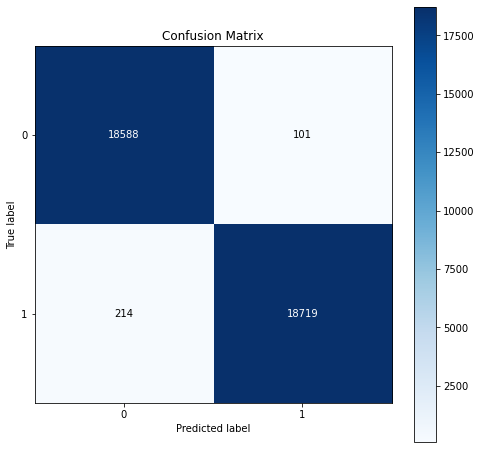

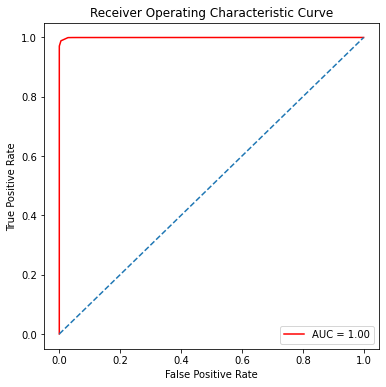

Accuracy:  0.9917074207952371
Precision:  0.9963752665245202
Recall:  0.9871144909167723
F1Score:  0.991723259762309
Area under ROC Curve:  0.9994648294399013


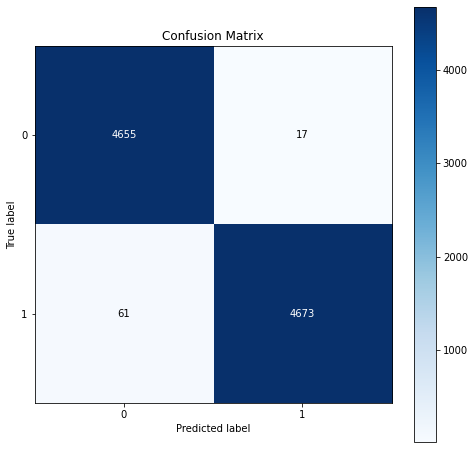

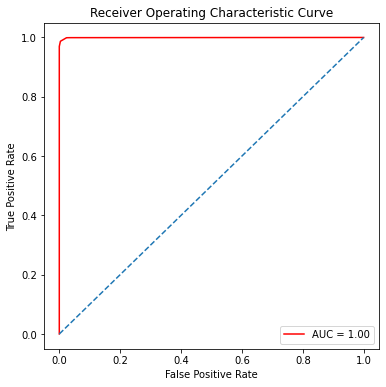

In [126]:
optimal_params = {
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 0.8,
 'max_leaf_nodes': 16,
 'min_samples_split': 20}

model_decisionTree = DecisionTreeClassifier(random_state = 1, **optimal_params)
_ = model_decisionTree.fit(trn_features, trn_target)

_ = modelPerformance(model_decisionTree,trn_features,trn_target)
_ = modelPerformance(model_decisionTree,val_features,val_target)

**This model gave a very good accuracy, wow :-)**

**Implementing KFold Cross Validation to check for Overfitting**

In [127]:
from sklearn.model_selection import StratifiedKFold

In [128]:
def run_clf_kfold(clf, train, test, features):

  N_SPLITS = 5

  oofs = np.zeros(len(train))
  preds = np.zeros((len(test)))

  folds = StratifiedKFold(n_splits = N_SPLITS)
  feature_importances = pd.DataFrame()

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train[TARGET_COL])):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
  
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    ############# Scaling Data ################
    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)


    ############# Fitting and Predicting ################

    model = clf.fit(X_trn, y_trn)

    fold_importance = pd.DataFrame({'fold': fold_ + 1, 'feature': features, 'importance': clf.feature_importances_})
    feature_importances = pd.concat([feature_importances, fold_importance], axis=0)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict_proba(X_val)[:, 1]
    preds_test = clf.predict_proba(X_test)[:, 1]

    fold_score = f1_score(y_val, preds_val.round())
    print(f'\nF1 score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = f1_score(target, oofs.round())
  print(f'\n\nF1 score for oofs is {oofs_score}')

  feature_importances = feature_importances.reset_index(drop = True)
  fi = feature_importances.groupby('feature')['importance'].mean().sort_values(ascending = False)[:20][::-1]
  fi.plot(kind = 'barh', figsize=(12, 6))

  return model, oofs, preds

In [129]:
target = train_data_encoded[TARGET_COL]

**Model 3 : Decision Tree Classifier with Cross Validation and Hyper Parameter Tuning**


------------- Fold 1 -------------

F1 score for validation set is 0.9754483347566183

------------- Fold 2 -------------

F1 score for validation set is 0.993338267949667

------------- Fold 3 -------------

F1 score for validation set is 0.9938572336369413

------------- Fold 4 -------------

F1 score for validation set is 0.99428208386277

------------- Fold 5 -------------

F1 score for validation set is 0.9944903581267218


F1 score for oofs is 0.9903073235911684


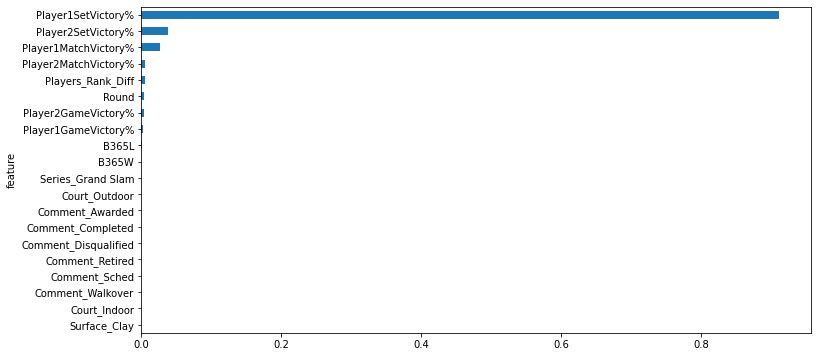

In [130]:
dt_params = {
             'criterion': 'gini',
             'max_depth': 5,
             'max_features': 0.8,
             'max_leaf_nodes': 32,
             'min_samples_split': 20,
             'random_state': 1
             }

clf = DecisionTreeClassifier(**dt_params)
        

model_dt, dt_oofs, dt_preds = run_clf_kfold(clf, train_data_encoded, test_data_2017_encoded, FEATURES)

**Testing the model on 2017 and 2018 Datasets after normalizing the features of the dataset**

Accuracy:  0.9958254269449716
Precision:  0.994748687171793
Recall:  0.9969924812030075
F1Score:  0.9958693203154337
Area under ROC Curve:  0.9991507504393166


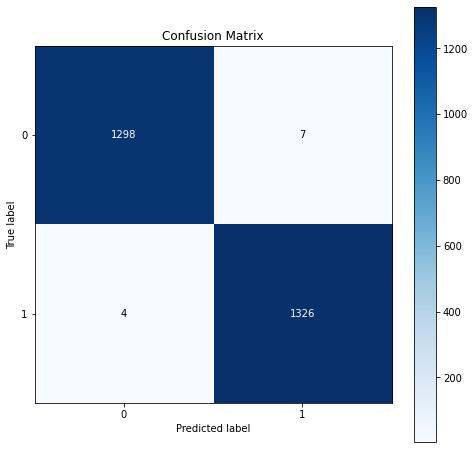

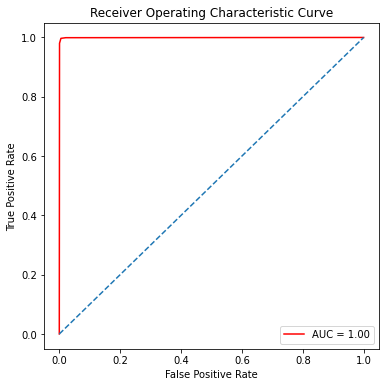

Accuracy:  0.994343891402715
Precision:  0.9945269741985927
Recall:  0.99375
F1Score:  0.9941383352872216
Area under ROC Curve:  0.9987857028972303


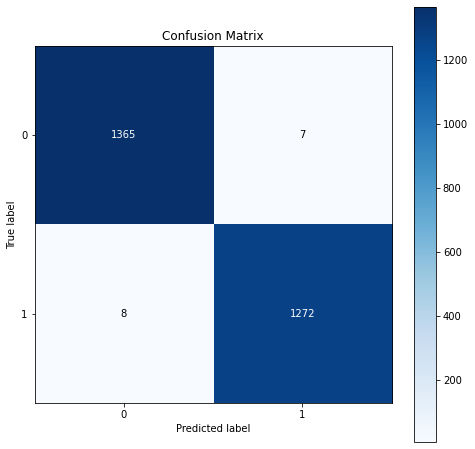

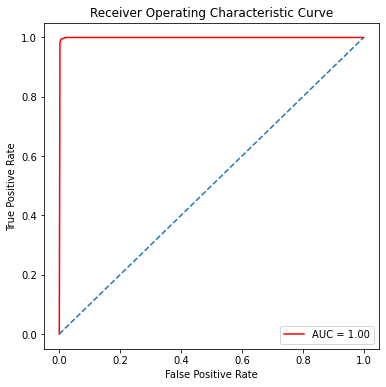

Accuracy:  0.9957578094870806
Precision:  0.9976452119309263
Recall:  0.9937451133698202
F1Score:  0.9956913435174306
Area under ROC Curve:  0.9999196718326604


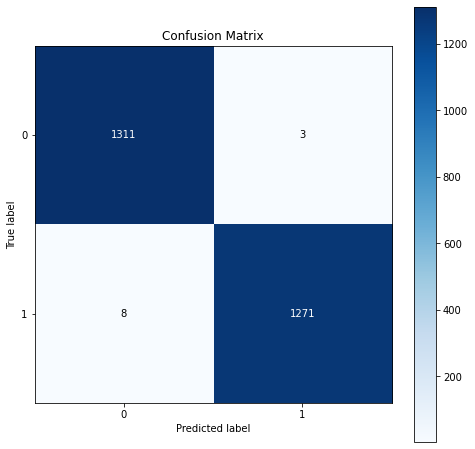

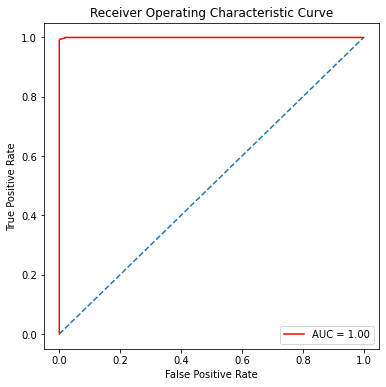

In [131]:
test_2017_scaled = scaler.transform(test_data_2017_encoded)
test_2018_scaled = scaler.transform(test_data_2018_encoded)
test_2019_scaled = scaler.transform(test_data_2019_encoded)

_ = modelPerformance(model_dt,test_2017_scaled,target_test_2017)
_ = modelPerformance(model_dt,test_2018_scaled,target_test_2018)
_ = modelPerformance(model_dt,test_2019_scaled,target_test_2019)

**Model gave a very good performance**

**Model 4 : RandomForest Classifier using Cross Validation and Hyper Parameter Tuning**


------------- Fold 1 -------------
building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100

building tree 10 of 100


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.


building tree 11 of 100
building tree 12 of 100
building tree 13 of 100building tree 14 of 100

building tree 15 of 100building tree 16 of 100

building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    1.4s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100building tree 37 of 100

building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100building tree 68 of 100

building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72

[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.



F1 score for validation set is 0.982445075160307

------------- Fold 2 -------------
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100building tree 6 of 100
building tree 7 of 100

building tree 8 of 100building tree 9 of 100

building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    1.5s


building tree 31 of 100building tree 32 of 100

building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100building tree 48 of 100

building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72

[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.



F1 score for validation set is 0.995048983461498

------------- Fold 3 -------------
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100building tree 19 of 100

building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    1.6s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100building tree 37 of 100

building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100building tree 58 of 100

building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72

[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    5.5s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.



F1 score for validation set is 0.9977827050997782

------------- Fold 4 -------------
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100building tree 10 of 100

building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100


[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    1.3s


building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100building tree 49 of 100

building tree 50 of 100
building tree 51 of 100building tree 52 of 100

building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100building tree 58 of 100

building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100building tree 63 of 100

building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73

[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    5.5s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.



F1 score for validation set is 0.9993660185967879

------------- Fold 5 -------------
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100building tree 14 of 100
building tree 15 of 100

building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    1.4s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100building tree 49 of 100

building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100building tree 54 of 100

building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72

[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished



F1 score for validation set is 0.9985197716219074


F1 score for oofs is 0.9946201396653939


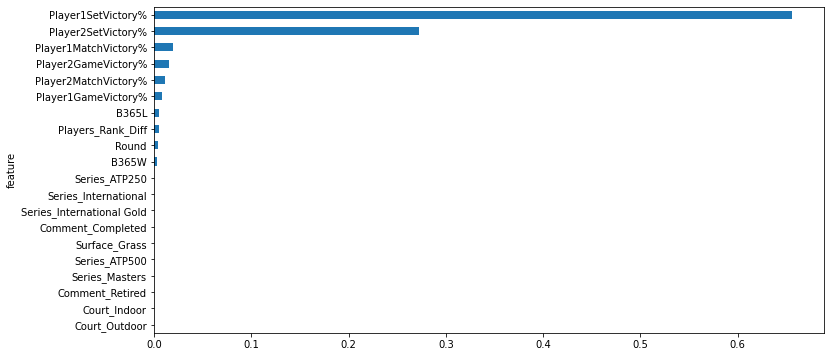

In [132]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {'n_estimators': 100,
             'n_jobs' : 10,
             'criterion': 'gini',
             'max_depth': 7,
             'max_features': 0.8,
             'max_leaf_nodes': 32,
             'min_samples_split': 20,
             'verbose' : 2,
             'random_state': 1
             }

clf = RandomForestClassifier(**rf_params)
        

model_rf, rf_oofs, rf_preds = run_clf_kfold(clf, train_data_encoded, test_data_2017_encoded, FEATURES)

**Testing the model on 2017 and 2018 Datasets and verifying the performance**

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy:  0.9992409867172676
Precision:  0.9992481203007518
Recall:  0.9992481203007518
F1Score:  0.9992481203007518
Area under ROC Curve:  0.9999988476939476


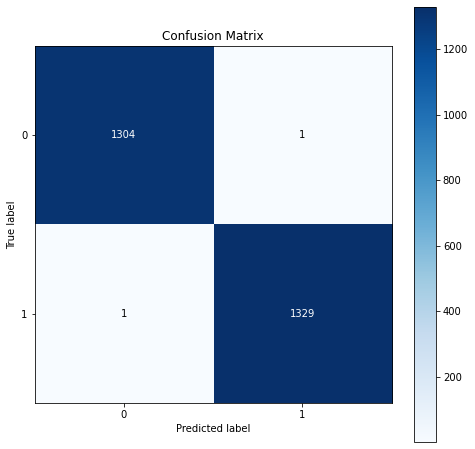

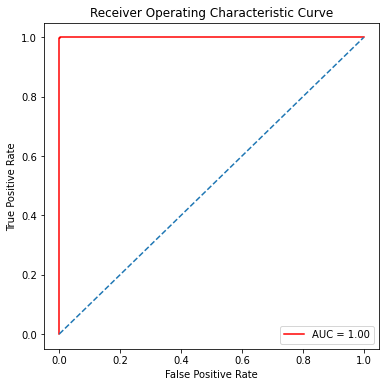

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy:  0.9984917043740573
Precision:  0.9992175273865415
Recall:  0.99765625
F1Score:  0.9984362783424551
Area under ROC Curve:  0.9999829172740525


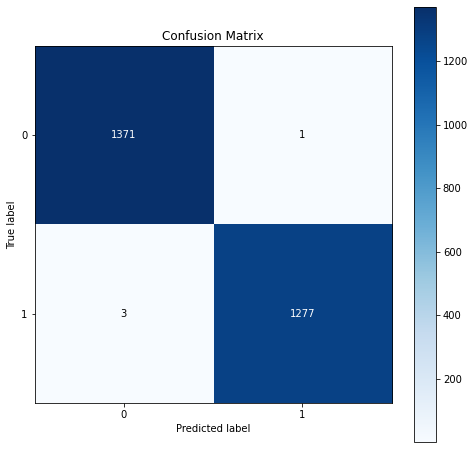

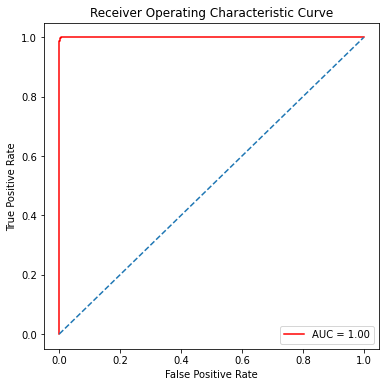

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy:  0.9980717315850366
Precision:  0.9984350547730829
Recall:  0.9976544175136826
F1Score:  0.9980445834962848
Area under ROC Curve:  0.999986909483841


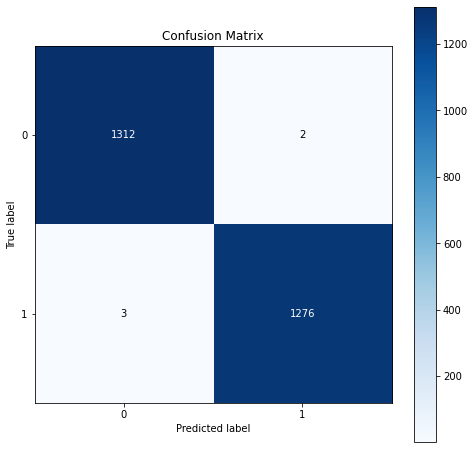

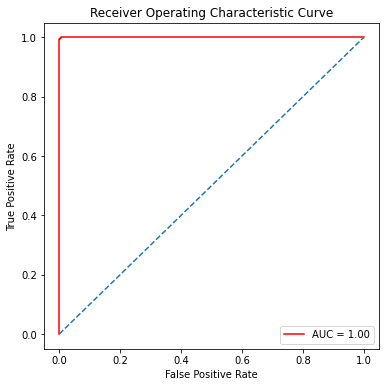

In [133]:
test_2017_scaled = scaler.transform(test_data_2017_encoded)
test_2018_scaled = scaler.transform(test_data_2018_encoded)
test_2019_scaled = scaler.transform(test_data_2019_encoded)

_ = modelPerformance(model_rf,test_2017_scaled,target_test_2017)
_ = modelPerformance(model_rf,test_2018_scaled,target_test_2018)
_ = modelPerformance(model_rf,test_2019_scaled,target_test_2019)

**This model also gave a very good performance**

***Thanks a lot for providing a great learning opportunity  !!***